In [1]:
import numpy as np
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

from framework.mtl_model import MTLModel
from framework.trainer import Trainer
from data.dataloader.cityscapes_dataloader import CityScapes
from data.heads.pixel2pixel import ASPPHeadNode
from data.metrics.pixel2pixel_loss import CityScapesCriterions
from data.metrics.pixel2pixel_metrics import CityScapesMetrics

In [2]:
dataroot = '/mnt/nfs/work1/huiguan/lijunzhang/policymtl/data/Cityscapes/'

headsDict = nn.ModuleDict()
trainDataloaderDict = {}
valDataloaderDict = {}
criterionDict = {}
metricDict = {}

tasks = ['segment_semantic', 'depth_zbuffer']
task_cls_num = {'segment_semantic': 19, 'depth_zbuffer': 1}
for task in tasks:
    headsDict[task] = ASPPHeadNode(512, task_cls_num[task])

    # For model trainer
    dataset = CityScapes(dataroot, 'train', task, crop_h=224, crop_w=224)
    trainDataloaderDict[task] = DataLoader(dataset, 16, shuffle=True)

    dataset = CityScapes(dataroot, 'test', task)
    valDataloaderDict[task] = DataLoader(dataset, 16, shuffle=True)

    criterionDict[task] = CityScapesCriterions(task)
    metricDict[task] = CityScapesMetrics(task)

In [3]:
prototxt = 'models/deeplab_resnet34_adashare.prototxt'
# prototxt = 'models/mobilenetv2.prototxt'
# prototxt = 'models/mnasnet.prototxt'
mtlmodel = MTLModel(prototxt, headsDict, BNsp=True)
mtlmodel = mtlmodel.cuda()

In [5]:
trainer = Trainer(mtlmodel, trainDataloaderDict, valDataloaderDict, criterionDict, metricDict, 
                  print_iters=100, val_iters=200, policy_update_iters=100)

In [6]:
trainer.pre_train(iters=10000, lr=0.0001, savePath='checkpoints/Cityscapes/', reload='pre_train_all_2000iter.model')

[Iter 2050 Task segm] Train Loss: 0.5143
[Iter 2050 Task dept] Train Loss: 0.0217
[Iter 2050 Total] Train Loss: 0.2680
[Iter 2100 Task segm] Train Loss: 0.4637
[Iter 2100 Task dept] Train Loss: 0.0213
[Iter 2100 Total] Train Loss: 0.2425
[Iter 2150 Task segm] Train Loss: 0.4574
[Iter 2150 Task dept] Train Loss: 0.0205
[Iter 2150 Total] Train Loss: 0.2389
[Iter 2200 Task segm] Train Loss: 0.4476
[Iter 2200 Task dept] Train Loss: 0.0203
[Iter 2200 Total] Train Loss: 0.2339
[Iter 2200 Task segm] Val Loss: 0.9370
{'mIoU': 0.2595, 'Pixel Acc': 0.6065, 'cmp': -0.2713}
[Iter 2200 Task dept] Val Loss: 0.0956
{'abs_err': 0.0935, 'rel_err': 2.467, 'sigma_1.25': 26.6127, 'sigma_1.25^2': 42.6742, 'sigma_1.25^3': 51.8795, 'cmp': -2.5088}
[Iter 2250 Task segm] Train Loss: 0.4394
[Iter 2250 Task dept] Train Loss: 0.0201
[Iter 2250 Total] Train Loss: 0.2298
[Iter 2300 Task segm] Train Loss: 0.4446
[Iter 2300 Task dept] Train Loss: 0.0189
[Iter 2300 Total] Train Loss: 0.2317
[Iter 2350 Task segm] Train

[Iter 3600 Task segm] Train Loss: 0.3689
[Iter 3600 Task dept] Train Loss: 0.0177
[Iter 3600 Total] Train Loss: 0.1933
[Iter 3600 Task segm] Val Loss: 1.4957
{'mIoU': 0.1748, 'Pixel Acc': 0.5406, 'cmp': -0.4207}
[Iter 3600 Task dept] Val Loss: 0.1065
{'abs_err': 0.1044, 'rel_err': 2.7337, 'sigma_1.25': 23.15, 'sigma_1.25^2': 40.9303, 'sigma_1.25^3': 50.0324, 'cmp': -2.8173}
[Iter 3650 Task segm] Train Loss: 0.4020
[Iter 3650 Task dept] Train Loss: 0.0181
[Iter 3650 Total] Train Loss: 0.2100
[Iter 3700 Task segm] Train Loss: 0.3951
[Iter 3700 Task dept] Train Loss: 0.0176
[Iter 3700 Total] Train Loss: 0.2064
[Iter 3750 Task segm] Train Loss: 0.4014
[Iter 3750 Task dept] Train Loss: 0.0171
[Iter 3750 Total] Train Loss: 0.2093
[Iter 3800 Task segm] Train Loss: 0.3749
[Iter 3800 Task dept] Train Loss: 0.0179
[Iter 3800 Total] Train Loss: 0.1964
[Iter 3800 Task segm] Val Loss: 1.6010
{'mIoU': 0.1758, 'Pixel Acc': 0.5505, 'cmp': -0.4129}
[Iter 3800 Task dept] Val Loss: 0.1092
{'abs_err': 0.1

[Iter 5050 Total] Train Loss: 0.1860
[Iter 5100 Task segm] Train Loss: 0.3613
[Iter 5100 Task dept] Train Loss: 0.0170
[Iter 5100 Total] Train Loss: 0.1892
[Iter 5150 Task segm] Train Loss: 0.3385
[Iter 5150 Task dept] Train Loss: 0.0164
[Iter 5150 Total] Train Loss: 0.1775
[Iter 5200 Task segm] Train Loss: 0.3531
[Iter 5200 Task dept] Train Loss: 0.0167
[Iter 5200 Total] Train Loss: 0.1849
[Iter 5200 Task segm] Val Loss: 2.5822
{'mIoU': 0.1622, 'Pixel Acc': 0.42, 'cmp': -0.5171}
[Iter 5200 Task dept] Val Loss: 0.1146
{'abs_err': 0.1128, 'rel_err': 2.9495, 'sigma_1.25': 22.2777, 'sigma_1.25^2': 39.269, 'sigma_1.25^3': 48.0924, 'cmp': -3.0574}
[Iter 5250 Task segm] Train Loss: 0.3570
[Iter 5250 Task dept] Train Loss: 0.0162
[Iter 5250 Total] Train Loss: 0.1866
[Iter 5300 Task segm] Train Loss: 0.3463
[Iter 5300 Task dept] Train Loss: 0.0167
[Iter 5300 Total] Train Loss: 0.1815
[Iter 5350 Task segm] Train Loss: 0.3359
[Iter 5350 Task dept] Train Loss: 0.0169
[Iter 5350 Total] Train Loss:

[Iter 6600 Total] Train Loss: 0.1786
[Iter 6600 Task segm] Val Loss: 1.7116
{'mIoU': 0.1817, 'Pixel Acc': 0.5553, 'cmp': -0.4023}
[Iter 6600 Task dept] Val Loss: 0.0850
{'abs_err': 0.0833, 'rel_err': 1.9788, 'sigma_1.25': 20.714, 'sigma_1.25^2': 42.4984, 'sigma_1.25^3': 58.2807, 'cmp': -2.0965}
[Iter 6650 Task segm] Train Loss: 0.3350
[Iter 6650 Task dept] Train Loss: 0.0162
[Iter 6650 Total] Train Loss: 0.1756
[Iter 6700 Task segm] Train Loss: 0.3217
[Iter 6700 Task dept] Train Loss: 0.0161
[Iter 6700 Total] Train Loss: 0.1689
[Iter 6750 Task segm] Train Loss: 0.3357
[Iter 6750 Task dept] Train Loss: 0.0163
[Iter 6750 Total] Train Loss: 0.1760
[Iter 6800 Task segm] Train Loss: 0.3280
[Iter 6800 Task dept] Train Loss: 0.0162
[Iter 6800 Total] Train Loss: 0.1721
[Iter 6800 Task segm] Val Loss: 1.1479
{'mIoU': 0.2075, 'Pixel Acc': 0.6085, 'cmp': -0.3346}
[Iter 6800 Task dept] Val Loss: 0.0758
{'abs_err': 0.0745, 'rel_err': 1.6921, 'sigma_1.25': 21.7334, 'sigma_1.25^2': 44.4366, 'sigma_1.

[Iter 8100 Task segm] Train Loss: 0.3271
[Iter 8100 Task dept] Train Loss: 0.0152
[Iter 8100 Total] Train Loss: 0.1712
[Iter 8150 Task segm] Train Loss: 0.3063
[Iter 8150 Task dept] Train Loss: 0.0156
[Iter 8150 Total] Train Loss: 0.1609
[Iter 8200 Task segm] Train Loss: 0.3051
[Iter 8200 Task dept] Train Loss: 0.0154
[Iter 8200 Total] Train Loss: 0.1603
[Iter 8200 Task segm] Val Loss: 1.2307
{'mIoU': 0.2002, 'Pixel Acc': 0.5812, 'cmp': -0.362}
[Iter 8200 Task dept] Val Loss: 0.0941
{'abs_err': 0.0921, 'rel_err': 2.2972, 'sigma_1.25': 22.0893, 'sigma_1.25^2': 42.3863, 'sigma_1.25^3': 53.9933, 'cmp': -2.3984}
[Iter 8250 Task segm] Train Loss: 0.3006
[Iter 8250 Task dept] Train Loss: 0.0161
[Iter 8250 Total] Train Loss: 0.1584
[Iter 8300 Task segm] Train Loss: 0.3336
[Iter 8300 Task dept] Train Loss: 0.0159
[Iter 8300 Total] Train Loss: 0.1747
[Iter 8350 Task segm] Train Loss: 0.3160
[Iter 8350 Task dept] Train Loss: 0.0160
[Iter 8350 Total] Train Loss: 0.1660
[Iter 8400 Task segm] Train

[Iter 9600 Task segm] Val Loss: 1.3054
{'mIoU': 0.1964, 'Pixel Acc': 0.5882, 'cmp': -0.362}
[Iter 9600 Task dept] Val Loss: 0.1058
{'abs_err': 0.1044, 'rel_err': 2.6382, 'sigma_1.25': 19.6295, 'sigma_1.25^2': 38.3761, 'sigma_1.25^3': 51.6513, 'cmp': -2.7714}
[Iter 9650 Task segm] Train Loss: 0.3068
[Iter 9650 Task dept] Train Loss: 0.0154
[Iter 9650 Total] Train Loss: 0.1611
[Iter 9700 Task segm] Train Loss: 0.3020
[Iter 9700 Task dept] Train Loss: 0.0155
[Iter 9700 Total] Train Loss: 0.1588
[Iter 9750 Task segm] Train Loss: 0.2949
[Iter 9750 Task dept] Train Loss: 0.0161
[Iter 9750 Total] Train Loss: 0.1555
[Iter 9800 Task segm] Train Loss: 0.3090
[Iter 9800 Task dept] Train Loss: 0.0156
[Iter 9800 Total] Train Loss: 0.1623
[Iter 9800 Task segm] Val Loss: 1.2233
{'mIoU': 0.1882, 'Pixel Acc': 0.5828, 'cmp': -0.3758}
[Iter 9800 Task dept] Val Loss: 0.0981
{'abs_err': 0.0964, 'rel_err': 2.4097, 'sigma_1.25': 20.8561, 'sigma_1.25^2': 40.3609, 'sigma_1.25^3': 53.4102, 'cmp': -2.5273}
[Iter

In [6]:
trainer.task_alter_train(iters=20000, task_iters=(100,100), policy_lr=0.01, network_lr=0.001, 
                         tau=5, 
                         savePath='checkpoints/Cityscapes/', reload='pre_train_all_10000iter.model')

tau: 4.825
net.0.policy.segment_semantic Parameter containing:
tensor([ 0.0059,  0.0065, -0.0124], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([0., 0., 0.], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.0012,  0.0011, -0.0023], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([0., 0., 0.], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.0022,  0.0023, -0.0045], device='cuda:0', requires_grad=True)
net.7.policy.depth_zbuffer Parameter containing:
tensor([0., 0., 0.], device='cuda:0', requires_grad=True)
net.11.policy.segment_semantic Parameter containing:
tensor([-2.9610e-05, -3.1099e-04,  3.4060e-04], device='cuda:0',
       requires_grad=True)
net.11.policy.depth_zbuffer Parameter containing:
tensor([0., 0., 0.], device='cuda:0', requires_grad=True)
net.14.policy.segment_semantic Parameter

[Iter 400 Task dept] Train Loss: 0.0313
[Iter 400 Total] Train Loss: 0.1672
[Iter 400 Task segm] Val Loss: 0.5316
{'mIoU': 0.3108, 'Pixel Acc': 0.7043, 'cmp': -0.1421}
[Iter 400 Task dept] Val Loss: 0.0406
{'abs_err': 0.0426, 'rel_err': 0.548, 'sigma_1.25': 37.7907, 'sigma_1.25^2': 59.2871, 'sigma_1.25^3': 72.476, 'cmp': -0.633}
tau: 4.184143503015624
net.0.policy.segment_semantic Parameter containing:
tensor([ 0.0208,  0.0238, -0.0446], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([-0.0010,  0.0013, -0.0003], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.0070,  0.0077, -0.0147], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0005,  0.0002, -0.0007], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.0055,  0.0059, -0.0114], device='cuda:0', requires_grad=True)
net.7.policy.depth_zbuffer 

[Iter 800 Task dept] Train Loss: 0.0286
[Iter 800 Total] Train Loss: 0.1652
[Iter 800 Task segm] Val Loss: 0.5052
{'mIoU': 0.3079, 'Pixel Acc': 0.7056, 'cmp': -0.1447}
[Iter 800 Task dept] Val Loss: 0.0385
{'abs_err': 0.039, 'rel_err': 0.6425, 'sigma_1.25': 43.6823, 'sigma_1.25^2': 64.0495, 'sigma_1.25^3': 76.112, 'cmp': -0.6126}
tau: 3.6284055655601786
net.0.policy.segment_semantic Parameter containing:
tensor([ 0.0337,  0.0377, -0.0714], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([-0.0008,  0.0014, -0.0005], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.0144,  0.0137, -0.0281], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0008,  0.0003, -0.0011], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.0097,  0.0098, -0.0195], device='cuda:0', requires_grad=True)
net.7.policy.depth_zbuffe

[Iter 1200 Task dept] Train Loss: 0.0282
[Iter 1200 Total] Train Loss: 0.1667
[Iter 1200 Task segm] Val Loss: 0.4953
{'mIoU': 0.3135, 'Pixel Acc': 0.7075, 'cmp': -0.1365}
[Iter 1200 Task dept] Val Loss: 0.0447
{'abs_err': 0.0466, 'rel_err': 0.6862, 'sigma_1.25': 37.647, 'sigma_1.25^2': 60.0622, 'sigma_1.25^3': 73.6694, 'cmp': -0.7603}
tau: 3.1464807406102286
net.0.policy.segment_semantic Parameter containing:
tensor([ 0.0551,  0.0540, -0.1091], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.0003,  0.0010, -0.0013], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.0269,  0.0261, -0.0530], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0013,  0.0004, -0.0017], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.0126,  0.0131, -0.0257], device='cuda:0', requires_grad=True)
net.7.policy.depth_z

[Iter 1600 Task dept] Train Loss: 0.0269
[Iter 1600 Total] Train Loss: 0.1653
[Iter 1600 Task segm] Val Loss: 0.6820
{'mIoU': 0.2704, 'Pixel Acc': 0.6705, 'cmp': -0.2148}
[Iter 1600 Task dept] Val Loss: 0.0480
{'abs_err': 0.0489, 'rel_err': 0.698, 'sigma_1.25': 35.0609, 'sigma_1.25^2': 56.4971, 'sigma_1.25^3': 70.8227, 'cmp': -0.8156}
tau: 2.728565170608928
net.0.policy.segment_semantic Parameter containing:
tensor([ 0.0870,  0.0831, -0.1701], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.0012,  0.0009, -0.0020], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.0424,  0.0454, -0.0878], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0025,  0.0006, -0.0031], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.0176,  0.0196, -0.0372], device='cuda:0', requires_grad=True)
net.7.policy.depth_zb

[Iter 2000 Task dept] Train Loss: 0.0268
[Iter 2000 Total] Train Loss: 0.1682
[Iter 2000 Task segm] Val Loss: 0.8051
{'mIoU': 0.259, 'Pixel Acc': 0.6512, 'cmp': -0.242}
[Iter 2000 Task dept] Val Loss: 0.0465
{'abs_err': 0.047, 'rel_err': 0.8047, 'sigma_1.25': 38.3669, 'sigma_1.25^2': 59.9507, 'sigma_1.25^3': 73.405, 'cmp': -0.8351}
tau: 2.366157146354003
net.0.policy.segment_semantic Parameter containing:
tensor([ 0.1347,  0.1552, -0.2899], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.0029,  0.0009, -0.0038], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.0658,  0.0726, -0.1383], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0033,  0.0007, -0.0040], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.0261,  0.0248, -0.0509], device='cuda:0', requires_grad=True)
net.7.policy.depth_zbuff

[Iter 2400 Task dept] Train Loss: 0.0261
[Iter 2400 Total] Train Loss: 0.1681
[Iter 2400 Task segm] Val Loss: 0.8938
{'mIoU': 0.2362, 'Pixel Acc': 0.6377, 'cmp': -0.2794}
[Iter 2400 Task dept] Val Loss: 0.0470
{'abs_err': 0.0465, 'rel_err': 0.8013, 'sigma_1.25': 37.9803, 'sigma_1.25^2': 58.7095, 'sigma_1.25^3': 72.5435, 'cmp': -0.8335}
tau: 2.051884155654112
net.0.policy.segment_semantic Parameter containing:
tensor([ 0.1801,  0.1875, -0.3676], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.0056, -0.0006, -0.0049], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.0813,  0.0848, -0.1661], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0041,  0.0007, -0.0049], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.0367,  0.0323, -0.0690], device='cuda:0', requires_grad=True)
net.7.policy.depth_z

[Iter 2800 Task dept] Train Loss: 0.0254
[Iter 2800 Total] Train Loss: 0.1720
[Iter 2800 Task segm] Val Loss: 0.9358
{'mIoU': 0.2237, 'Pixel Acc': 0.6221, 'cmp': -0.3054}
[Iter 2800 Task dept] Val Loss: 0.0577
{'abs_err': 0.0568, 'rel_err': 1.0219, 'sigma_1.25': 36.3312, 'sigma_1.25^2': 56.1162, 'sigma_1.25^3': 68.6226, 'cmp': -1.1074}
tau: 1.7793529033825604
net.0.policy.segment_semantic Parameter containing:
tensor([ 0.2542,  0.2660, -0.5202], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.0068, -0.0006, -0.0062], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.1229,  0.1254, -0.2483], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0050,  0.0009, -0.0059], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.0446,  0.0433, -0.0879], device='cuda:0', requires_grad=True)
net.7.policy.depth_

[Iter 3200 Task dept] Train Loss: 0.0251
[Iter 3200 Total] Train Loss: 0.1764
[Iter 3200 Task segm] Val Loss: 1.0481
{'mIoU': 0.2115, 'Pixel Acc': 0.6075, 'cmp': -0.3303}
[Iter 3200 Task dept] Val Loss: 0.0597
{'abs_err': 0.0588, 'rel_err': 1.0762, 'sigma_1.25': 32.4579, 'sigma_1.25^2': 52.3654, 'sigma_1.25^3': 66.0205, 'cmp': -1.1883}
tau: 1.5430192518673842
net.0.policy.segment_semantic Parameter containing:
tensor([ 0.3302,  0.3231, -0.6533], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.0089, -0.0005, -0.0084], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.1595,  0.1626, -0.3221], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0064,  0.0010, -0.0074], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.0641,  0.0571, -0.1211], device='cuda:0', requires_grad=True)
net.7.policy.depth_

[Iter 3600 Task dept] Train Loss: 0.0250
[Iter 3600 Total] Train Loss: 0.1755
[Iter 3600 Task segm] Val Loss: 1.2141
{'mIoU': 0.1992, 'Pixel Acc': 0.5886, 'cmp': -0.3582}
[Iter 3600 Task dept] Val Loss: 0.0645
{'abs_err': 0.0645, 'rel_err': 1.0293, 'sigma_1.25': 32.0812, 'sigma_1.25^2': 51.9854, 'sigma_1.25^3': 65.3698, 'cmp': -1.2307}
tau: 1.338075435798745
net.0.policy.segment_semantic Parameter containing:
tensor([ 0.3945,  0.3917, -0.7862], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.0158, -0.0016, -0.0141], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.1943,  0.2011, -0.3953], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0078,  0.0010, -0.0089], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.0845,  0.0766, -0.1611], device='cuda:0', requires_grad=True)
net.7.policy.depth_z

[Iter 4000 Task dept] Train Loss: 0.0257
[Iter 4000 Total] Train Loss: 0.1788
[Iter 4000 Task segm] Val Loss: 1.5018
{'mIoU': 0.1699, 'Pixel Acc': 0.5487, 'cmp': -0.4214}
[Iter 4000 Task dept] Val Loss: 0.0672
{'abs_err': 0.0664, 'rel_err': 1.3612, 'sigma_1.25': 30.2685, 'sigma_1.25^2': 51.5563, 'sigma_1.25^3': 64.5878, 'cmp': -1.4615}
tau: 1.1603522572522524
net.0.policy.segment_semantic Parameter containing:
tensor([ 0.4559,  0.4491, -0.9050], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.0214, -0.0023, -0.0192], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.2292,  0.2536, -0.4828], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0091,  0.0007, -0.0098], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.1130,  0.1067, -0.2197], device='cuda:0', requires_grad=True)
net.7.policy.depth_

[Iter 4400 Task dept] Train Loss: 0.0255
[Iter 4400 Total] Train Loss: 0.1874
[Iter 4400 Task segm] Val Loss: 1.0350
{'mIoU': 0.2132, 'Pixel Acc': 0.6206, 'cmp': -0.3195}
[Iter 4400 Task dept] Val Loss: 0.0643
{'abs_err': 0.0658, 'rel_err': 0.7447, 'sigma_1.25': 22.9258, 'sigma_1.25^2': 42.3828, 'sigma_1.25^3': 58.0313, 'cmp': -1.1379}
tau: 1.0062342711692285
net.0.policy.segment_semantic Parameter containing:
tensor([ 0.5841,  0.5587, -1.1429], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.0287, -0.0035, -0.0251], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.2782,  0.2987, -0.5769], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0100,  0.0010, -0.0110], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.1508,  0.1437, -0.2944], device='cuda:0', requires_grad=True)
net.7.policy.depth_

[Iter 4800 Task dept] Train Loss: 0.0260
[Iter 4800 Total] Train Loss: 0.1877
[Iter 4800 Task segm] Val Loss: 1.4059
{'mIoU': 0.1782, 'Pixel Acc': 0.5405, 'cmp': -0.4165}
[Iter 4800 Task dept] Val Loss: 0.0823
{'abs_err': 0.0832, 'rel_err': 1.5146, 'sigma_1.25': 29.9676, 'sigma_1.25^2': 50.1429, 'sigma_1.25^3': 65.0727, 'cmp': -1.7554}
tau: 0.8725862359014279
net.0.policy.segment_semantic Parameter containing:
tensor([ 0.6731,  0.6492, -1.3223], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.0364, -0.0044, -0.0320], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.3462,  0.3552, -0.7014], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0118,  0.0006, -0.0124], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.1774,  0.1745, -0.3519], device='cuda:0', requires_grad=True)
net.7.policy.depth_

[Iter 5200 Task dept] Train Loss: 0.0266
[Iter 5200 Total] Train Loss: 0.1954
[Iter 5200 Task segm] Val Loss: 1.6511
{'mIoU': 0.1526, 'Pixel Acc': 0.5029, 'cmp': -0.4736}
[Iter 5200 Task dept] Val Loss: 0.0670
{'abs_err': 0.0663, 'rel_err': 1.2706, 'sigma_1.25': 29.5567, 'sigma_1.25^2': 48.9331, 'sigma_1.25^3': 62.0455, 'cmp': -1.4202}
tau: 0.7566893325943664
net.0.policy.segment_semantic Parameter containing:
tensor([ 0.8091,  0.7494, -1.5586], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.0451, -0.0056, -0.0395], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.4214,  0.4140, -0.8353], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0117,  0.0008, -0.0125], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.1994,  0.1933, -0.3927], device='cuda:0', requires_grad=True)
net.7.policy.depth_

[Iter 5600 Task dept] Train Loss: 0.0273
[Iter 5600 Total] Train Loss: 0.1884
[Iter 5600 Task segm] Val Loss: 1.7395
{'mIoU': 0.1443, 'Pixel Acc': 0.5097, 'cmp': -0.4794}
[Iter 5600 Task dept] Val Loss: 0.0788
{'abs_err': 0.0785, 'rel_err': 1.5891, 'sigma_1.25': 29.2722, 'sigma_1.25^2': 48.8289, 'sigma_1.25^3': 62.3185, 'cmp': -1.7569}
tau: 0.6561858559121135
net.0.policy.segment_semantic Parameter containing:
tensor([ 0.8642,  0.8159, -1.6801], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.0538, -0.0052, -0.0486], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.5148,  0.4697, -0.9845], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0143,  0.0002, -0.0145], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.2209,  0.2293, -0.4501], device='cuda:0', requires_grad=True)
net.7.policy.depth_

[Iter 6000 Task dept] Train Loss: 0.0265
[Iter 6000 Total] Train Loss: 0.1978
[Iter 6000 Task segm] Val Loss: 1.1213
{'mIoU': 0.2013, 'Pixel Acc': 0.5978, 'cmp': -0.3495}
[Iter 6000 Task dept] Val Loss: 0.0770
{'abs_err': 0.0767, 'rel_err': 1.3962, 'sigma_1.25': 24.5851, 'sigma_1.25^2': 44.1239, 'sigma_1.25^3': 59.9736, 'cmp': -1.6479}
tau: 0.5690312509399826
net.0.policy.segment_semantic Parameter containing:
tensor([ 0.9075,  0.8598, -1.7673], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.0630, -0.0061, -0.0569], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.5808,  0.5169, -1.0977], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0154, -0.0009, -0.0145], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.2583,  0.2495, -0.5078], device='cuda:0', requires_grad=True)
net.7.policy.depth_

[Iter 6400 Task dept] Train Loss: 0.0266
[Iter 6400 Total] Train Loss: 0.1972
[Iter 6400 Task segm] Val Loss: 1.5260
{'mIoU': 0.1473, 'Pixel Acc': 0.5133, 'cmp': -0.4733}
[Iter 6400 Task dept] Val Loss: 0.0801
{'abs_err': 0.0804, 'rel_err': 1.498, 'sigma_1.25': 25.3048, 'sigma_1.25^2': 43.8087, 'sigma_1.25^3': 58.1373, 'cmp': -1.7558}
tau: 0.49345252054577865
net.0.policy.segment_semantic Parameter containing:
tensor([ 0.9815,  0.9476, -1.9290], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.0739, -0.0062, -0.0677], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.6070,  0.5817, -1.1887], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0176, -0.0014, -0.0161], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.3132,  0.2877, -0.6008], device='cuda:0', requires_grad=True)
net.7.policy.depth_

[Iter 6800 Task dept] Train Loss: 0.0268
[Iter 6800 Total] Train Loss: 0.1906
[Iter 6800 Task segm] Val Loss: 1.6520
{'mIoU': 0.1468, 'Pixel Acc': 0.4855, 'cmp': -0.4925}
[Iter 6800 Task dept] Val Loss: 0.0823
{'abs_err': 0.0821, 'rel_err': 1.2621, 'sigma_1.25': 22.3377, 'sigma_1.25^2': 38.8333, 'sigma_1.25^3': 52.165, 'cmp': -1.6652}
tau: 0.4279121570752961
net.0.policy.segment_semantic Parameter containing:
tensor([ 1.0336,  0.9619, -1.9955], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.0867, -0.0045, -0.0822], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.6333,  0.6275, -1.2608], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0179, -0.0018, -0.0161], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.3543,  0.3211, -0.6755], device='cuda:0', requires_grad=True)
net.7.policy.depth_z

[Iter 7200 Task dept] Train Loss: 0.0283
[Iter 7200 Total] Train Loss: 0.1872
[Iter 7200 Task segm] Val Loss: 3.0015
{'mIoU': 0.1448, 'Pixel Acc': 0.4662, 'cmp': -0.5079}
[Iter 7200 Task dept] Val Loss: 0.0742
{'abs_err': 0.0747, 'rel_err': 1.2236, 'sigma_1.25': 26.881, 'sigma_1.25^2': 45.3134, 'sigma_1.25^3': 60.0229, 'cmp': -1.5101}
tau: 0.37107686464000034
net.0.policy.segment_semantic Parameter containing:
tensor([ 1.1133,  1.1084, -2.2217], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.1005, -0.0012, -0.0994], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.6771,  0.6936, -1.3707], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0190, -0.0025, -0.0165], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.3957,  0.3628, -0.7585], device='cuda:0', requires_grad=True)
net.7.policy.depth_

[Iter 7600 Task dept] Train Loss: 0.0283
[Iter 7600 Total] Train Loss: 0.1988
[Iter 7600 Task segm] Val Loss: 1.3410
{'mIoU': 0.1641, 'Pixel Acc': 0.5362, 'cmp': -0.437}
[Iter 7600 Task dept] Val Loss: 0.0927
{'abs_err': 0.0939, 'rel_err': 1.6673, 'sigma_1.25': 25.2512, 'sigma_1.25^2': 44.0878, 'sigma_1.25^3': 58.23, 'cmp': -2.0165}
tau: 0.32179043571043847
net.0.policy.segment_semantic Parameter containing:
tensor([ 1.3062,  1.1337, -2.4400], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.1085,  0.0022, -0.1106], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.7060,  0.7120, -1.4181], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0207, -0.0022, -0.0185], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.4285,  0.4056, -0.8342], device='cuda:0', requires_grad=True)
net.7.policy.depth_zb

[Iter 8000 Task dept] Train Loss: 0.0291
[Iter 8000 Total] Train Loss: 0.1959
[Iter 8000 Task segm] Val Loss: 1.0927
{'mIoU': 0.1906, 'Pixel Acc': 0.5985, 'cmp': -0.3623}
[Iter 8000 Task dept] Val Loss: 0.0718
{'abs_err': 0.072, 'rel_err': 1.3522, 'sigma_1.25': 25.1176, 'sigma_1.25^2': 47.8126, 'sigma_1.25^3': 63.0922, 'cmp': -1.549}
tau: 0.279050230240497
net.0.policy.segment_semantic Parameter containing:
tensor([ 1.3412,  1.1770, -2.5182], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.1170,  0.0054, -0.1224], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.8035,  0.7428, -1.5463], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0202, -0.0010, -0.0192], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.4460,  0.4544, -0.9004], device='cuda:0', requires_grad=True)
net.7.policy.depth_zbu

[Iter 8400 Task dept] Train Loss: 0.0285
[Iter 8400 Total] Train Loss: 0.1908
[Iter 8400 Task segm] Val Loss: 1.3990
{'mIoU': 0.1676, 'Pixel Acc': 0.5505, 'cmp': -0.4231}
[Iter 8400 Task dept] Val Loss: 0.0776
{'abs_err': 0.0767, 'rel_err': 1.3753, 'sigma_1.25': 26.5731, 'sigma_1.25^2': 45.0254, 'sigma_1.25^3': 57.4603, 'cmp': -1.6324}
tau: 0.24198677883436054
net.0.policy.segment_semantic Parameter containing:
tensor([ 1.5010,  1.2926, -2.7936], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.1309,  0.0069, -0.1378], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.8379,  0.7776, -1.6155], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0204, -0.0010, -0.0194], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.4814,  0.5232, -1.0046], device='cuda:0', requires_grad=True)
net.7.policy.depth

[Iter 8800 Task dept] Train Loss: 0.0276
[Iter 8800 Total] Train Loss: 0.1891
[Iter 8800 Task segm] Val Loss: 1.3895
{'mIoU': 0.1698, 'Pixel Acc': 0.545, 'cmp': -0.424}
[Iter 8800 Task dept] Val Loss: 0.0903
{'abs_err': 0.0799, 'rel_err': 1.2083, 'sigma_1.25': 31.6282, 'sigma_1.25^2': 49.0159, 'sigma_1.25^3': 63.0609, 'cmp': -1.5338}
tau: 0.20984609502082247
net.0.policy.segment_semantic Parameter containing:
tensor([ 1.5224,  1.3541, -2.8765], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.1433,  0.0105, -0.1538], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.8554,  0.7930, -1.6484], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0203, -0.0013, -0.0191], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.5020,  0.5444, -1.0464], device='cuda:0', requires_grad=True)
net.7.policy.depth_z

[Iter 9200 Task dept] Train Loss: 0.0283
[Iter 9200 Total] Train Loss: 0.1871
[Iter 9200 Task segm] Val Loss: 2.2292
{'mIoU': 0.1253, 'Pixel Acc': 0.4747, 'cmp': -0.5264}
[Iter 9200 Task dept] Val Loss: 0.0825
{'abs_err': 0.082, 'rel_err': 1.3403, 'sigma_1.25': 27.2416, 'sigma_1.25^2': 45.2604, 'sigma_1.25^3': 58.1318, 'cmp': -1.6703}
tau: 0.18197433681131062
net.0.policy.segment_semantic Parameter containing:
tensor([ 1.5114,  1.3533, -2.8647], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.1559,  0.0141, -0.1699], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.8507,  0.8047, -1.6554], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0193, -0.0023, -0.0170], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.5256,  0.5731, -1.0987], device='cuda:0', requires_grad=True)
net.7.policy.depth_

[Iter 9600 Task dept] Train Loss: 0.0285
[Iter 9600 Total] Train Loss: 0.1875
[Iter 9600 Task segm] Val Loss: 1.5388
{'mIoU': 0.1623, 'Pixel Acc': 0.5248, 'cmp': -0.4468}
[Iter 9600 Task dept] Val Loss: 0.0855
{'abs_err': 0.0832, 'rel_err': 1.4266, 'sigma_1.25': 27.9265, 'sigma_1.25^2': 45.9734, 'sigma_1.25^3': 57.5525, 'cmp': -1.7345}
tau: 0.1578045055097663
net.0.policy.segment_semantic Parameter containing:
tensor([ 1.6268,  1.3599, -2.9867], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.1654,  0.0198, -0.1852], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.8775,  0.8265, -1.7040], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0209, -0.0026, -0.0182], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.5455,  0.5904, -1.1360], device='cuda:0', requires_grad=True)
net.7.policy.depth_

[Iter 10000 Task dept] Train Loss: 0.0296
[Iter 10000 Total] Train Loss: 0.1831
[Iter 10000 Task segm] Val Loss: 1.1483
{'mIoU': 0.1938, 'Pixel Acc': 0.5932, 'cmp': -0.3619}
[Iter 10000 Task dept] Val Loss: 0.0736
{'abs_err': 0.0737, 'rel_err': 1.2692, 'sigma_1.25': 26.381, 'sigma_1.25^2': 45.7045, 'sigma_1.25^3': 58.695, 'cmp': -1.5291}
tau: 0.13684491118658695
net.0.policy.segment_semantic Parameter containing:
tensor([ 1.6136,  1.3615, -2.9752], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.1804,  0.0288, -0.2092], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 0.9074,  0.8338, -1.7412], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0216, -0.0024, -0.0192], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.5851,  0.6128, -1.1979], device='cuda:0', requires_grad=True)
net.7.policy.dep

[Iter 10400 Task dept] Train Loss: 0.0282
[Iter 10400 Total] Train Loss: 0.1889
[Iter 10400 Task segm] Val Loss: 1.3687
{'mIoU': 0.1715, 'Pixel Acc': 0.5524, 'cmp': -0.4169}
[Iter 10400 Task dept] Val Loss: 0.0719
{'abs_err': 0.0705, 'rel_err': 1.3085, 'sigma_1.25': 30.0472, 'sigma_1.25^2': 49.6316, 'sigma_1.25^3': 62.5062, 'cmp': -1.4878}
tau: 0.11866917016831255
net.0.policy.segment_semantic Parameter containing:
tensor([ 1.6106,  1.3530, -2.9636], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.1922,  0.0385, -0.2307], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 1.0214,  0.8448, -1.8662], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0222,  0.0003, -0.0225], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.5906,  0.6443, -1.2349], device='cuda:0', requires_grad=True)
net.7.policy.d

[Iter 10800 Task dept] Train Loss: 0.0279
[Iter 10800 Total] Train Loss: 0.1939
[Iter 10800 Task segm] Val Loss: 1.5353
{'mIoU': 0.177, 'Pixel Acc': 0.551, 'cmp': -0.4111}
[Iter 10800 Task dept] Val Loss: 0.0845
{'abs_err': 0.0846, 'rel_err': 1.6402, 'sigma_1.25': 22.9762, 'sigma_1.25^2': 41.3374, 'sigma_1.25^3': 55.6711, 'cmp': -1.9087}
tau: 0.10290753106072549
net.0.policy.segment_semantic Parameter containing:
tensor([ 1.6025,  1.3500, -2.9525], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.1990,  0.0490, -0.2481], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 1.0296,  0.8753, -1.9049], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0192,  0.0005, -0.0197], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.6435,  0.6418, -1.2853], device='cuda:0', requires_grad=True)
net.7.policy.dep

[Iter 11200 Task dept] Train Loss: 0.0279
[Iter 11200 Total] Train Loss: 0.1824
[Iter 11200 Task segm] Val Loss: 1.1134
{'mIoU': 0.2116, 'Pixel Acc': 0.6081, 'cmp': -0.3298}
[Iter 11200 Task dept] Val Loss: 0.0947
{'abs_err': 0.0788, 'rel_err': 1.1722, 'sigma_1.25': 25.9569, 'sigma_1.25^2': 45.798, 'sigma_1.25^3': 60.7063, 'cmp': -1.5274}
tau: 0.08923935284955713
net.0.policy.segment_semantic Parameter containing:
tensor([ 1.6067,  1.3341, -2.9408], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.2092,  0.0551, -0.2642], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 1.0990,  0.9358, -2.0348], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0193,  0.0024, -0.0217], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.6572,  0.6390, -1.2962], device='cuda:0', requires_grad=True)
net.7.policy.de

[Iter 11600 Task dept] Train Loss: 0.0286
[Iter 11600 Total] Train Loss: 0.1923
[Iter 11600 Task segm] Val Loss: 1.1255
{'mIoU': 0.1802, 'Pixel Acc': 0.5787, 'cmp': -0.3885}
[Iter 11600 Task dept] Val Loss: 0.0848
{'abs_err': 0.0842, 'rel_err': 1.4184, 'sigma_1.25': 28.4313, 'sigma_1.25^2': 45.9673, 'sigma_1.25^3': 58.2526, 'cmp': -1.7385}
tau: 0.07738658205985353
net.0.policy.segment_semantic Parameter containing:
tensor([ 1.6049,  1.3242, -2.9291], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.2188,  0.0648, -0.2836], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 1.1887,  0.9329, -2.1216], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0188,  0.0022, -0.0210], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.6678,  0.7340, -1.4018], device='cuda:0', requires_grad=True)
net.7.policy.d

[Iter 12000 Task dept] Train Loss: 0.0278
[Iter 12000 Total] Train Loss: 0.1797
[Iter 12000 Task segm] Val Loss: 1.0734
{'mIoU': 0.1988, 'Pixel Acc': 0.6054, 'cmp': -0.3476}
[Iter 12000 Task dept] Val Loss: 0.0845
{'abs_err': 0.0846, 'rel_err': 1.2158, 'sigma_1.25': 24.2298, 'sigma_1.25^2': 40.1151, 'sigma_1.25^3': 51.4729, 'cmp': -1.6596}
tau: 0.0671080962790304
net.0.policy.segment_semantic Parameter containing:
tensor([ 1.6026,  1.3146, -2.9173], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.2347,  0.0707, -0.3054], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 1.1959,  0.9270, -2.1229], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0189,  0.0029, -0.0217], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.7095,  0.7470, -1.4565], device='cuda:0', requires_grad=True)
net.7.policy.de

[Iter 12400 Task dept] Train Loss: 0.0279
[Iter 12400 Total] Train Loss: 0.1792
[Iter 12400 Task segm] Val Loss: 1.4668
{'mIoU': 0.1851, 'Pixel Acc': 0.5406, 'cmp': -0.4079}
[Iter 12400 Task dept] Val Loss: 0.0873
{'abs_err': 0.0877, 'rel_err': 1.7371, 'sigma_1.25': 26.11, 'sigma_1.25^2': 44.2653, 'sigma_1.25^3': 56.7295, 'cmp': -1.9858}
tau: 0.05819479897319213
net.0.policy.segment_semantic Parameter containing:
tensor([ 1.6702,  1.3059, -2.9762], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.2518,  0.0764, -0.3282], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 1.1984,  0.9216, -2.1199], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0195,  0.0026, -0.0221], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.7642,  0.7610, -1.5252], device='cuda:0', requires_grad=True)
net.7.policy.dep

[Iter 12800 Task dept] Train Loss: 0.0281
[Iter 12800 Total] Train Loss: 0.1813
[Iter 12800 Task segm] Val Loss: 1.2842
{'mIoU': 0.2002, 'Pixel Acc': 0.5768, 'cmp': -0.3649}
[Iter 12800 Task dept] Val Loss: 0.0933
{'abs_err': 0.0913, 'rel_err': 1.5457, 'sigma_1.25': 25.5192, 'sigma_1.25^2': 42.9193, 'sigma_1.25^3': 55.9808, 'cmp': -1.919}
tau: 0.05046536580994449
net.0.policy.segment_semantic Parameter containing:
tensor([ 1.6516,  1.3006, -2.9522], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.2554,  0.0756, -0.3310], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 1.1928,  0.9522, -2.1450], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0217,  0.0030, -0.0247], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.7509,  0.7943, -1.5452], device='cuda:0', requires_grad=True)
net.7.policy.de

[Iter 13200 Task dept] Train Loss: 0.0276
[Iter 13200 Total] Train Loss: 0.1768
[Iter 13200 Task segm] Val Loss: 1.6718
{'mIoU': 0.1691, 'Pixel Acc': 0.5348, 'cmp': -0.4317}
[Iter 13200 Task dept] Val Loss: 0.0734
{'abs_err': 0.0727, 'rel_err': 1.3549, 'sigma_1.25': 32.4834, 'sigma_1.25^2': 50.8555, 'sigma_1.25^3': 63.3211, 'cmp': -1.5304}
tau: 0.04376255595460851
net.0.policy.segment_semantic Parameter containing:
tensor([ 1.6478,  1.2927, -2.9405], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.2677,  0.0866, -0.3543], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 1.1921,  0.9475, -2.1396], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0230,  0.0032, -0.0261], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.7759,  0.8472, -1.6231], device='cuda:0', requires_grad=True)
net.7.policy.d

[Iter 13600 Task dept] Train Loss: 0.0263
[Iter 13600 Total] Train Loss: 0.1812
[Iter 13600 Task segm] Val Loss: 1.1593
{'mIoU': 0.1832, 'Pixel Acc': 0.5742, 'cmp': -0.3877}
[Iter 13600 Task dept] Val Loss: 0.0756
{'abs_err': 0.0748, 'rel_err': 1.2159, 'sigma_1.25': 23.7585, 'sigma_1.25^2': 42.6949, 'sigma_1.25^3': 58.1044, 'cmp': -1.5263}
tau: 0.037950013300069
net.0.policy.segment_semantic Parameter containing:
tensor([ 1.6150,  1.3138, -2.9288], device='cuda:0', requires_grad=True)
net.0.policy.depth_zbuffer Parameter containing:
tensor([ 0.2768,  0.1000, -0.3768], device='cuda:0', requires_grad=True)
net.4.policy.segment_semantic Parameter containing:
tensor([ 1.1887,  0.9368, -2.1255], device='cuda:0', requires_grad=True)
net.4.policy.depth_zbuffer Parameter containing:
tensor([ 0.0232,  0.0074, -0.0306], device='cuda:0', requires_grad=True)
net.7.policy.segment_semantic Parameter containing:
tensor([ 0.7779,  0.8566, -1.6345], device='cuda:0', requires_grad=True)
net.7.policy.dep

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/lijunzhang/anaconda3/envs/multitask/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-86614717fef9>", line 3, in <module>
    savePath='checkpoints/Cityscapes/', reload='pre_train_all_10000iter.model')
  File "/home/lijunzhang/policymtl2/framework/trainer.py", line 176, in task_alter_train
    self.train_step_task('mtl', self.tasks[task_idx], optimizer,tau=tau)
  File "/home/lijunzhang/policymtl2/framework/trainer.py", line 373, in train_step_task
    loss.backward()
  File "/home/lijunzhang/anaconda3/envs/multitask/lib/python3.6/site-packages/torch/tensor.py", line 185, in backward
    torch.autograd.backward(self, gradient, retain_graph, create_graph)
  File "/home/lijunzhang/anaconda3/envs/multitask/lib/python3.6/site-packages/torch/autograd/__init__.py", line 127, in backward
    allow_unreachable=True)  # allow_unreacha

KeyboardInterrupt: 

In [5]:
# alter_train w/o reg
trainer.alter_train(iters=20000, policy_network_iters=(100,100), policy_lr=0.01, network_lr=0.001, 
                    tau=5, 
                    savePath='/mnt/nfs/work1/huiguan/lijunzhang/policymtl/checkpoint/Cityscapes-training/', reload='pre_train_all_10000iter.model')

[Iter 8100 Task segm] Train Loss: 0.2829
[Iter 8100 Task dept] Train Loss: 0.0179
[Iter 8100 Total] Train Loss: 0.1504
[Iter 8200 Task segm] Train Loss: 0.2758
[Iter 8200 Task dept] Train Loss: 0.0175
[Iter 8200 Total] Train Loss: 0.1466
[Iter 8300 Task segm] Train Loss: 0.2824
[Iter 8300 Task dept] Train Loss: 0.0180
[Iter 8300 Total] Train Loss: 0.1502
[Iter 8400 Task segm] Train Loss: 0.2759
[Iter 8400 Task dept] Train Loss: 0.0176
[Iter 8400 Total] Train Loss: 0.1468
[Iter 8500 Task segm] Train Loss: 0.2755
[Iter 8500 Task dept] Train Loss: 0.0177
[Iter 8500 Total] Train Loss: 0.1466
[Iter 8500 Task segm] Val Loss: 0.4597
{'mIoU': 0.32, 'Pixel Acc': 0.7126, 'cmp': -0.125}
[Iter 8500 Task dept] Val Loss: 0.0302
{'abs_err': 0.0308, 'rel_err': 0.6219, 'sigma_1.25': 54.3325, 'sigma_1.25^2': 72.943, 'sigma_1.25^3': 83.1928, 'cmp': -0.4368}
tau: 3.0363539146888705
[Iter 8600 Task segm] Train Loss: 0.2827
[Iter 8600 Task dept] Train Loss: 0.0180
[Iter 8600 Total] Train Loss: 0.1504
[Iter 

[Iter 11300 Task segm] Train Loss: 0.2853
[Iter 11300 Task dept] Train Loss: 0.0179
[Iter 11300 Total] Train Loss: 0.1516
[Iter 11400 Task segm] Train Loss: 0.2860
[Iter 11400 Task dept] Train Loss: 0.0187
[Iter 11400 Total] Train Loss: 0.1524
[Iter 11500 Task segm] Train Loss: 0.2821
[Iter 11500 Task dept] Train Loss: 0.0183
[Iter 11500 Total] Train Loss: 0.1502
[Iter 11500 Task segm] Val Loss: 0.6436
{'mIoU': 0.2781, 'Pixel Acc': 0.6827, 'cmp': -0.1972}
[Iter 11500 Task dept] Val Loss: 0.0381
{'abs_err': 0.0385, 'rel_err': 0.7072, 'sigma_1.25': 47.6531, 'sigma_1.25^2': 67.4792, 'sigma_1.25^3': 78.7822, 'cmp': -0.6212}
tau: 2.451976317465288
[Iter 11600 Task segm] Train Loss: 0.2918
[Iter 11600 Task dept] Train Loss: 0.0186
[Iter 11600 Total] Train Loss: 0.1552
[Iter 11700 Task segm] Train Loss: 0.2793
[Iter 11700 Task dept] Train Loss: 0.0183
[Iter 11700 Total] Train Loss: 0.1488
[Iter 11800 Task segm] Train Loss: 0.2860
[Iter 11800 Task dept] Train Loss: 0.0179
[Iter 11800 Total] Tr

In [6]:
trainer.post_train(iters=30000, task_iters=(100,100), lr=0.001,
                   decay_lr_freq=4000, decay_lr_rate=0.5,
                   savePath='/mnt/nfs/work1/huiguan/lijunzhang/policymtl/checkpoint/Cityscapes-training/', reload='random_policy_with_bottom20_shared_seed98.model')

Task Policy:
OrderedDict([('net.0.policy.segment_semantic', tensor([1., 0., 0.], device='cuda:0')), ('net.4.policy.segment_semantic', tensor([1., 0., 0.], device='cuda:0')), ('net.7.policy.segment_semantic', tensor([1., 0., 0.], device='cuda:0')), ('net.11.policy.segment_semantic', tensor([1., 0., 0.], device='cuda:0')), ('net.14.policy.segment_semantic', tensor([1., 0., 0.], device='cuda:0')), ('net.18.policy.segment_semantic', tensor([1., 0., 0.], device='cuda:0')), ('net.21.policy.segment_semantic', tensor([1., 0., 0.], device='cuda:0')), ('net.25.policy.segment_semantic', tensor([1., 0., 0.], device='cuda:0')), ('net.27.policy.segment_semantic', tensor([1., 0., 0.], device='cuda:0')), ('net.30.policy.segment_semantic', tensor([1., 0., 0.], device='cuda:0')), ('net.34.policy.segment_semantic', tensor([1., 0., 0.], device='cuda:0')), ('net.37.policy.segment_semantic', tensor([1., 0., 0.], device='cuda:0')), ('net.41.policy.segment_semantic', tensor([1., 0., 0.], device='cuda:0')), ('

[Iter 1200 Task segm] Train Loss: 0.6974
[Iter 1200 Task dept] Train Loss: 0.0295
[Iter 1200 Total] Train Loss: 0.3635
[Iter 1200 Task segm] Val Loss: 1.0201
{'mIoU': 0.4027, 'Pixel Acc': 0.5416, 'cmp': -0.1366}
[Iter 1200 Task dept] Val Loss: 0.0246
{'abs_err': 0.0271, 'rel_err': 0.399, 'sigma_1.25': 57.7441, 'sigma_1.25^2': 77.573, 'sigma_1.25^3': 87.7783, 'cmp': -0.2281}
[Iter 1400 Task segm] Train Loss: 0.6416
[Iter 1400 Task dept] Train Loss: 0.0275
[Iter 1400 Total] Train Loss: 0.3345
[Iter 1400 Task segm] Val Loss: 1.1275
{'mIoU': 0.3126, 'Pixel Acc': 0.558, 'cmp': -0.2377}
[Iter 1400 Task dept] Val Loss: 0.0256
{'abs_err': 0.0295, 'rel_err': 0.4566, 'sigma_1.25': 54.4899, 'sigma_1.25^2': 77.4812, 'sigma_1.25^3': 87.6785, 'cmp': -0.3011}
[Iter 1600 Task segm] Train Loss: 0.6091
[Iter 1600 Task dept] Train Loss: 0.0289
[Iter 1600 Total] Train Loss: 0.3190
[Iter 1600 Task segm] Val Loss: 0.8322
{'mIoU': 0.3487, 'Pixel Acc': 0.6261, 'cmp': -0.1472}
[Iter 1600 Task dept] Val Loss: 0

[Iter 4400 Task segm] Train Loss: 0.4463
[Iter 4400 Task dept] Train Loss: 0.0206
[Iter 4400 Total] Train Loss: 0.2334
[Iter 4400 Task segm] Val Loss: 0.6075
{'mIoU': 0.2991, 'Pixel Acc': 0.6846, 'cmp': -0.1697}
[Iter 4400 Task dept] Val Loss: 0.0201
{'abs_err': 0.0233, 'rel_err': 0.3937, 'sigma_1.25': 61.1884, 'sigma_1.25^2': 81.7955, 'sigma_1.25^3': 90.5506, 'cmp': -0.1551}
[Iter 4600 Task segm] Train Loss: 0.4387
[Iter 4600 Task dept] Train Loss: 0.0200
[Iter 4600 Total] Train Loss: 0.2293
[Iter 4600 Task segm] Val Loss: 0.4394
{'mIoU': 0.3286, 'Pixel Acc': 0.7217, 'cmp': -0.1082}
[Iter 4600 Task dept] Val Loss: 0.0274
{'abs_err': 0.0326, 'rel_err': 0.4017, 'sigma_1.25': 41.3958, 'sigma_1.25^2': 66.2324, 'sigma_1.25^3': 80.4143, 'cmp': -0.3839}
[Iter 4800 Task segm] Train Loss: 0.4295
[Iter 4800 Task dept] Train Loss: 0.0197
[Iter 4800 Total] Train Loss: 0.2246
[Iter 4800 Task segm] Val Loss: 0.6665
{'mIoU': 0.2766, 'Pixel Acc': 0.6699, 'cmp': -0.2076}
[Iter 4800 Task dept] Val Loss

{'abs_err': 0.0235, 'rel_err': 0.4094, 'sigma_1.25': 61.8712, 'sigma_1.25^2': 82.3104, 'sigma_1.25^3': 91.0669, 'cmp': -0.1631}
[Iter 7600 Task segm] Train Loss: 0.4088
[Iter 7600 Task dept] Train Loss: 0.0194
[Iter 7600 Total] Train Loss: 0.2141
[Iter 7600 Task segm] Val Loss: 0.4416
{'mIoU': 0.3105, 'Pixel Acc': 0.7186, 'cmp': -0.1329}
[Iter 7600 Task dept] Val Loss: 0.0187
{'abs_err': 0.0214, 'rel_err': 0.404, 'sigma_1.25': 65.4661, 'sigma_1.25^2': 83.3904, 'sigma_1.25^3': 91.2162, 'cmp': -0.1213}
[Iter 7800 Task segm] Train Loss: 0.3951
[Iter 7800 Task dept] Train Loss: 0.0192
[Iter 7800 Total] Train Loss: 0.2072
[Iter 7800 Task segm] Val Loss: 0.5351
{'mIoU': 0.2934, 'Pixel Acc': 0.6914, 'cmp': -0.1723}
[Iter 7800 Task dept] Val Loss: 0.0193
{'abs_err': 0.0232, 'rel_err': 0.3451, 'sigma_1.25': 62.4231, 'sigma_1.25^2': 83.9182, 'sigma_1.25^3': 92.2879, 'cmp': -0.1118}
[Iter 8000 Task segm] Train Loss: 0.4115
[Iter 8000 Task dept] Train Loss: 0.0192
[Iter 8000 Total] Train Loss: 0.2

[Iter 10600 Task segm] Val Loss: 0.3786
{'mIoU': 0.3486, 'Pixel Acc': 0.7261, 'cmp': -0.0803}
[Iter 10600 Task dept] Val Loss: 0.0170
{'abs_err': 0.0206, 'rel_err': 0.3433, 'sigma_1.25': 66.1126, 'sigma_1.25^2': 85.0231, 'sigma_1.25^3': 92.7834, 'cmp': -0.0666}
[Iter 10800 Task segm] Train Loss: 0.3562
[Iter 10800 Task dept] Train Loss: 0.0172
[Iter 10800 Total] Train Loss: 0.1867
[Iter 10800 Task segm] Val Loss: 0.3780
{'mIoU': 0.3268, 'Pixel Acc': 0.7337, 'cmp': -0.1025}
[Iter 10800 Task dept] Val Loss: 0.0172
{'abs_err': 0.0206, 'rel_err': 0.3322, 'sigma_1.25': 65.6702, 'sigma_1.25^2': 84.5124, 'sigma_1.25^3': 92.4751, 'cmp': -0.0628}
[Iter 11000 Task segm] Train Loss: 0.3390
[Iter 11000 Task dept] Train Loss: 0.0172
[Iter 11000 Total] Train Loss: 0.1781
[Iter 11000 Task segm] Val Loss: 0.3651
{'mIoU': 0.3428, 'Pixel Acc': 0.7369, 'cmp': -0.0804}
[Iter 11000 Task dept] Val Loss: 0.0178
{'abs_err': 0.0197, 'rel_err': 0.3477, 'sigma_1.25': 64.9745, 'sigma_1.25^2': 83.938, 'sigma_1.25^

[Iter 13800 Task segm] Train Loss: 0.3141
[Iter 13800 Task dept] Train Loss: 0.0161
[Iter 13800 Total] Train Loss: 0.1651
[Iter 13800 Task segm] Val Loss: 0.3366
{'mIoU': 0.3655, 'Pixel Acc': 0.738, 'cmp': -0.0514}
[Iter 13800 Task dept] Val Loss: 0.0162
{'abs_err': 0.0189, 'rel_err': 0.3294, 'sigma_1.25': 66.6395, 'sigma_1.25^2': 85.4088, 'sigma_1.25^3': 93.1426, 'cmp': -0.0349}
[Iter 14000 Task segm] Train Loss: 0.3042
[Iter 14000 Task dept] Train Loss: 0.0159
[Iter 14000 Total] Train Loss: 0.1601
[Iter 14000 Task segm] Val Loss: 0.3266
{'mIoU': 0.3685, 'Pixel Acc': 0.7396, 'cmp': -0.0466}
[Iter 14000 Task dept] Val Loss: 0.0159
{'abs_err': 0.0188, 'rel_err': 0.3317, 'sigma_1.25': 69.1491, 'sigma_1.25^2': 86.3202, 'sigma_1.25^3': 93.4108, 'cmp': -0.0246}
[Iter 14200 Task segm] Train Loss: 0.3179
[Iter 14200 Task dept] Train Loss: 0.0158
[Iter 14200 Total] Train Loss: 0.1669
[Iter 14200 Task segm] Val Loss: 0.3422
{'mIoU': 0.3656, 'Pixel Acc': 0.7342, 'cmp': -0.0539}
[Iter 14200 Task 

[Iter 17000 Task segm] Val Loss: 0.3080
{'mIoU': 0.3963, 'Pixel Acc': 0.744, 'cmp': -0.009}
[Iter 17000 Task dept] Val Loss: 0.0153
{'abs_err': 0.0186, 'rel_err': 0.3319, 'sigma_1.25': 69.3965, 'sigma_1.25^2': 86.4887, 'sigma_1.25^3': 93.5736, 'cmp': -0.0218}
[Iter 17200 Task segm] Train Loss: 0.2873
[Iter 17200 Task dept] Train Loss: 0.0151
[Iter 17200 Total] Train Loss: 0.1512
[Iter 17200 Task segm] Val Loss: 0.3118
{'mIoU': 0.3954, 'Pixel Acc': 0.7429, 'cmp': -0.0109}
[Iter 17200 Task dept] Val Loss: 0.0159
{'abs_err': 0.0177, 'rel_err': 0.3619, 'sigma_1.25': 70.6397, 'sigma_1.25^2': 86.2008, 'sigma_1.25^3': 92.9214, 'cmp': -0.0279}
[Iter 17400 Task segm] Train Loss: 0.2860
[Iter 17400 Task dept] Train Loss: 0.0148
[Iter 17400 Total] Train Loss: 0.1504
[Iter 17400 Task segm] Val Loss: 0.3110
{'mIoU': 0.3954, 'Pixel Acc': 0.7419, 'cmp': -0.0116}
[Iter 17400 Task dept] Val Loss: 0.0154
{'abs_err': 0.0185, 'rel_err': 0.3328, 'sigma_1.25': 70.3032, 'sigma_1.25^2': 87.0803, 'sigma_1.25^3

[Iter 20200 Task segm] Train Loss: 0.2774
[Iter 20200 Task dept] Train Loss: 0.0143
[Iter 20200 Total] Train Loss: 0.1459
[Iter 20200 Task segm] Val Loss: 0.3209
{'mIoU': 0.391, 'Pixel Acc': 0.7412, 'cmp': -0.0175}
[Iter 20200 Task dept] Val Loss: 0.0152
{'abs_err': 0.0172, 'rel_err': 0.3244, 'sigma_1.25': 71.405, 'sigma_1.25^2': 87.3056, 'sigma_1.25^3': 93.8951, 'cmp': 0.0076}
[Iter 20400 Task segm] Train Loss: 0.2717
[Iter 20400 Task dept] Train Loss: 0.0142
[Iter 20400 Total] Train Loss: 0.1429
[Iter 20400 Task segm] Val Loss: 0.3005
{'mIoU': 0.4071, 'Pixel Acc': 0.7448, 'cmp': 0.0049}
[Iter 20400 Task dept] Val Loss: 0.0150
{'abs_err': 0.0181, 'rel_err': 0.3225, 'sigma_1.25': 70.8828, 'sigma_1.25^2': 87.3007, 'sigma_1.25^3': 93.9023, 'cmp': -0.0031}
[Iter 20600 Task segm] Train Loss: 0.2649
[Iter 20600 Task dept] Train Loss: 0.0145
[Iter 20600 Total] Train Loss: 0.1397
[Iter 20600 Task segm] Val Loss: 0.3001
{'mIoU': 0.404, 'Pixel Acc': 0.7437, 'cmp': 0.0004}
[Iter 20600 Task dept]

[Iter 23400 Task segm] Train Loss: 0.2709
[Iter 23400 Task dept] Train Loss: 0.0140
[Iter 23400 Total] Train Loss: 0.1425
[Iter 23400 Task segm] Val Loss: 0.3016
{'mIoU': 0.4026, 'Pixel Acc': 0.744, 'cmp': -0.0013}
[Iter 23400 Task dept] Val Loss: 0.0153
{'abs_err': 0.0174, 'rel_err': 0.3593, 'sigma_1.25': 71.8721, 'sigma_1.25^2': 87.0133, 'sigma_1.25^3': 93.398, 'cmp': -0.0164}
[Iter 23600 Task segm] Train Loss: 0.2705
[Iter 23600 Task dept] Train Loss: 0.0142
[Iter 23600 Total] Train Loss: 0.1423
[Iter 23600 Task segm] Val Loss: 0.3032
{'mIoU': 0.4004, 'Pixel Acc': 0.7443, 'cmp': -0.0038}
[Iter 23600 Task dept] Val Loss: 0.0148
{'abs_err': 0.0173, 'rel_err': 0.3287, 'sigma_1.25': 71.6989, 'sigma_1.25^2': 87.5908, 'sigma_1.25^3': 93.9947, 'cmp': 0.0053}
[Iter 23800 Task segm] Train Loss: 0.2617
[Iter 23800 Task dept] Train Loss: 0.0139
[Iter 23800 Total] Train Loss: 0.1378
[Iter 23800 Task segm] Val Loss: 0.2967
{'mIoU': 0.4081, 'Pixel Acc': 0.7455, 'cmp': 0.0066}
[Iter 23800 Task dep

[Iter 26400 Task dept] Val Loss: 0.0148
{'abs_err': 0.0168, 'rel_err': 0.328, 'sigma_1.25': 72.2981, 'sigma_1.25^2': 87.7133, 'sigma_1.25^3': 94.0375, 'cmp': 0.0141}
[Iter 26600 Task segm] Train Loss: 0.2590
[Iter 26600 Task dept] Train Loss: 0.0139
[Iter 26600 Total] Train Loss: 0.1365
[Iter 26600 Task segm] Val Loss: 0.2960
{'mIoU': 0.4117, 'Pixel Acc': 0.7458, 'cmp': 0.0113}
[Iter 26600 Task dept] Val Loss: 0.0148
{'abs_err': 0.0168, 'rel_err': 0.3258, 'sigma_1.25': 72.4375, 'sigma_1.25^2': 87.7548, 'sigma_1.25^3': 94.045, 'cmp': 0.0155}
[Iter 26800 Task segm] Train Loss: 0.2582
[Iter 26800 Task dept] Train Loss: 0.0137
[Iter 26800 Total] Train Loss: 0.1359
[Iter 26800 Task segm] Val Loss: 0.2939
{'mIoU': 0.4073, 'Pixel Acc': 0.7448, 'cmp': 0.0051}
[Iter 26800 Task dept] Val Loss: 0.0147
{'abs_err': 0.0171, 'rel_err': 0.3301, 'sigma_1.25': 72.4705, 'sigma_1.25^2': 87.7753, 'sigma_1.25^3': 94.039, 'cmp': 0.0103}
[Iter 27000 Task segm] Train Loss: 0.2598
[Iter 27000 Task dept] Train L

[Iter 29600 Task segm] Val Loss: 0.2911
{'mIoU': 0.4147, 'Pixel Acc': 0.7456, 'cmp': 0.0148}
[Iter 29600 Task dept] Val Loss: 0.0150
{'abs_err': 0.0167, 'rel_err': 0.3358, 'sigma_1.25': 72.4893, 'sigma_1.25^2': 87.6918, 'sigma_1.25^3': 93.9269, 'cmp': 0.0105}
[Iter 29800 Task segm] Train Loss: 0.2568
[Iter 29800 Task dept] Train Loss: 0.0137
[Iter 29800 Total] Train Loss: 0.1353
[Iter 29800 Task segm] Val Loss: 0.2883
{'mIoU': 0.4161, 'Pixel Acc': 0.7462, 'cmp': 0.017}
[Iter 29800 Task dept] Val Loss: 0.0148
{'abs_err': 0.0169, 'rel_err': 0.3338, 'sigma_1.25': 72.7076, 'sigma_1.25^2': 87.8595, 'sigma_1.25^3': 94.0141, 'cmp': 0.0114}
[Iter 30000 Task segm] Train Loss: 0.2521
[Iter 30000 Task dept] Train Loss: 0.0136
[Iter 30000 Total] Train Loss: 0.1328
[Iter 30000 Task segm] Val Loss: 0.2968
{'mIoU': 0.4168, 'Pixel Acc': 0.7466, 'cmp': 0.0181}
[Iter 30000 Task dept] Val Loss: 0.0152
{'abs_err': 0.0165, 'rel_err': 0.3322, 'sigma_1.25': 72.7433, 'sigma_1.25^2': 87.8028, 'sigma_1.25^3': 9

In [5]:
mtlmodel.net

ModuleList(
  (0): Conv2dNode(
    (taskOp): ModuleDict(
      (segment_semantic): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (depth_zbuffer): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    )
    (dsOp): ModuleDict(
      (segment_semantic): ModuleList(
        (0): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): AvgPool2d(kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
        (2): LazyLayer()
      )
      (depth_zbuffer): ModuleList(
        (0): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): AvgPool2d(kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
        (2): LazyLayer()
      )
    )
    (policy): ParameterDict(
        (segment_semantic): Parameter containing: [torch.cuda.FloatTensor of size 3 (GPU 0)]
        (depth_zbuffer): Parameter containing: [torch.cuda.FloatTensor of size 3 (GPU 0)]
    )
    (basicOp): Conv2d(3, 64, kernel_size=(7, 7), st

# STL and Hard sharing

In [4]:
class TrainerBaselines(Trainer):
    def __init__(self, model, train_dataloader_dict, val_dataloader_dict, criterion_dict, metric_dict, 
                 print_iters=50, val_iters=2000, save_iters=200, save_num=5, policy_update_iters=100):
        super(TrainerBaselines, self).__init__(model, train_dataloader_dict, val_dataloader_dict, criterion_dict, metric_dict, 
                 print_iters, val_iters, save_iters,save_num, policy_update_iters)
        
    def stl_hard_sharing(self, iters, lr=0.001, decay_lr_freq=4000, decay_lr_rate=0.5, task=None, savePath=None, reload=None):
        self.model.train()
        writer = None
        
        optimizer = torch.optim.Adam(self.model.parameters(), lr=lr, betas=(0.5, 0.999), weight_decay=0.0001)
        start = 0
        if reload is not None and savePath is not None:
            state = torch.load(savePath + reload)
            self.model.load_state_dict(state['state_dict'])
            optimizer.load_state_dict(state['optimizer'])
            start = state['iter'] + 1
    
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=decay_lr_freq, gamma=decay_lr_rate)
        if task is None:
            stage = 'hard_sharing'
        else:
            stage = 'task_specific'
        
        for i in range(start, iters):
            if task is None:
                self.train_step(stage, optimizer, scheduler)
            else:
                self.train_step_task(stage, task, optimizer, scheduler)

            if (i+1) % self.print_iters == 0:
                self.print_train_loss(i, writer)
                self.reset_train_loss()
            if (i+1) % self.val_iters == 0:
                if task is None:
                    self.validate(stage, i, writer=writer)
                else:
                    self.validate_task(stage, i, task, writer=writer)
                
                self.model.train()
            if (i+1) % self.save_iters == 0:
                if savePath is not None:
                    state = {'iter': i,
                            'state_dict': self.model.state_dict(),
                            'optimizer': optimizer.state_dict()}
                    self.save_model(state, stage, savePath)

        # Reset loss list and the data iters
        self.set_train_loss_data_iter()
        return

In [5]:
trainer = TrainerBaselines(mtlmodel, trainDataloaderDict, valDataloaderDict, criterionDict, metricDict, 
                           val_iters=200, print_iters=100)

In [6]:
# Hard sharing
trainer.stl_hard_sharing(iters=20000, lr=0.001, decay_lr_freq=2000, decay_lr_rate=0.5, savePath='/mnt/nfs/work1/huiguan/lijunzhang/policymtl/checkpoint/Cityscapes-mnasnet/', reload='hard_sharing_15000iter.model')

[Iter 15100 Task segm] Train Loss: 0.3581
[Iter 15100 Task dept] Train Loss: 0.0185
[Iter 15100 Total] Train Loss: 0.1883
[Iter 15200 Task segm] Train Loss: 0.3678
[Iter 15200 Task dept] Train Loss: 0.0185
[Iter 15200 Total] Train Loss: 0.1931
[Iter 15200 Task segm] Val Loss: 0.3487
{'mIoU': 0.2641, 'Pixel Acc': 0.6352, 'cmp': -0.2464}
[Iter 15200 Task dept] Val Loss: 0.0222
{'abs_err': 0.0407, 'rel_err': 0.4903, 'sigma_1.25': 35.7539, 'sigma_1.25^2': 67.7806, 'sigma_1.25^3': 84.1385, 'cmp': -0.5369}
[Iter 15300 Task segm] Train Loss: 0.3498
[Iter 15300 Task dept] Train Loss: 0.0188
[Iter 15300 Total] Train Loss: 0.1843
[Iter 15400 Task segm] Train Loss: 0.3613
[Iter 15400 Task dept] Train Loss: 0.0188
[Iter 15400 Total] Train Loss: 0.1900
[Iter 15400 Task segm] Val Loss: 0.3480
{'mIoU': 0.2669, 'Pixel Acc': 0.6362, 'cmp': -0.2423}
[Iter 15400 Task dept] Val Loss: 0.0228
{'abs_err': 0.0414, 'rel_err': 0.4757, 'sigma_1.25': 34.8103, 'sigma_1.25^2': 67.6426, 'sigma_1.25^3': 84.1337, 'cmp

[Iter 17400 Task segm] Val Loss: 0.3449
{'mIoU': 0.266, 'Pixel Acc': 0.6342, 'cmp': -0.2446}
[Iter 17400 Task dept] Val Loss: 0.0228
{'abs_err': 0.0412, 'rel_err': 0.4785, 'sigma_1.25': 35.1709, 'sigma_1.25^2': 67.6373, 'sigma_1.25^3': 84.2221, 'cmp': -0.537}
[Iter 17500 Task segm] Train Loss: 0.3612
[Iter 17500 Task dept] Train Loss: 0.0189
[Iter 17500 Total] Train Loss: 0.1901
[Iter 17600 Task segm] Train Loss: 0.3434
[Iter 17600 Task dept] Train Loss: 0.0184
[Iter 17600 Total] Train Loss: 0.1809
[Iter 17600 Task segm] Val Loss: 0.3452
{'mIoU': 0.2675, 'Pixel Acc': 0.6356, 'cmp': -0.2418}
[Iter 17600 Task dept] Val Loss: 0.0232
{'abs_err': 0.0417, 'rel_err': 0.4851, 'sigma_1.25': 34.394, 'sigma_1.25^2': 67.0982, 'sigma_1.25^3': 84.0535, 'cmp': -0.5511}
[Iter 17700 Task segm] Train Loss: 0.3565
[Iter 17700 Task dept] Train Loss: 0.0180
[Iter 17700 Total] Train Loss: 0.1872
[Iter 17800 Task segm] Train Loss: 0.3633
[Iter 17800 Task dept] Train Loss: 0.0190
[Iter 17800 Total] Train Loss

[Iter 19700 Task segm] Train Loss: 0.3406
[Iter 19700 Task dept] Train Loss: 0.0185
[Iter 19700 Total] Train Loss: 0.1795
[Iter 19800 Task segm] Train Loss: 0.3573
[Iter 19800 Task dept] Train Loss: 0.0188
[Iter 19800 Total] Train Loss: 0.1880
[Iter 19800 Task segm] Val Loss: 0.3434
{'mIoU': 0.2665, 'Pixel Acc': 0.6349, 'cmp': -0.2436}
[Iter 19800 Task dept] Val Loss: 0.0217
{'abs_err': 0.0402, 'rel_err': 0.4842, 'sigma_1.25': 36.4919, 'sigma_1.25^2': 68.2217, 'sigma_1.25^3': 84.3036, 'cmp': -0.5234}
[Iter 19900 Task segm] Train Loss: 0.3461
[Iter 19900 Task dept] Train Loss: 0.0184
[Iter 19900 Total] Train Loss: 0.1823
[Iter 20000 Task segm] Train Loss: 0.3507
[Iter 20000 Task dept] Train Loss: 0.0184
[Iter 20000 Total] Train Loss: 0.1845
[Iter 20000 Task segm] Val Loss: 0.3431
{'mIoU': 0.2514, 'Pixel Acc': 0.6352, 'cmp': -0.2622}
[Iter 20000 Task dept] Val Loss: 0.0221
{'abs_err': 0.0406, 'rel_err': 0.4804, 'sigma_1.25': 35.9265, 'sigma_1.25^2': 67.8816, 'sigma_1.25^3': 84.2493, 'cmp

In [6]:
# STL
trainer.stl_hard_sharing(iters=40000, task=tasks[1], lr=0.001, savePath='/mnt/nfs/work1/huiguan/lijunzhang/policymtl/checkpoint/Cityscapes-mnasnet/')

[Iter 100 Task dept] Train Loss: 0.1666
[Iter 100 Total] Train Loss: 0.1666
[Iter 200 Task dept] Train Loss: 0.0381
[Iter 200 Total] Train Loss: 0.0381
[Iter 200 Task dept] Val Loss: 0.0520
{'abs_err': 0.0591, 'rel_err': 0.6419, 'sigma_1.25': 20.622, 'sigma_1.25^2': 48.2322, 'sigma_1.25^3': 75.0872, 'cmp': -0.9528}
[Iter 300 Task dept] Train Loss: 0.0363
[Iter 300 Total] Train Loss: 0.0363
[Iter 400 Task dept] Train Loss: 0.0331
[Iter 400 Total] Train Loss: 0.0331
[Iter 400 Task dept] Val Loss: 0.0493
{'abs_err': 0.0579, 'rel_err': 0.7401, 'sigma_1.25': 19.9939, 'sigma_1.25^2': 50.0977, 'sigma_1.25^3': 75.8671, 'cmp': -0.9943}
[Iter 500 Task dept] Train Loss: 0.0323
[Iter 500 Total] Train Loss: 0.0323
[Iter 600 Task dept] Train Loss: 0.0312
[Iter 600 Total] Train Loss: 0.0312
[Iter 600 Task dept] Val Loss: 0.0406
{'abs_err': 0.0505, 'rel_err': 0.5971, 'sigma_1.25': 24.8588, 'sigma_1.25^2': 60.0115, 'sigma_1.25^3': 81.0442, 'cmp': -0.7725}
[Iter 700 Task dept] Train Loss: 0.0296
[Iter 7

[Iter 3200 Total] Train Loss: 0.0241
[Iter 3200 Task dept] Val Loss: 0.0394
{'abs_err': 0.0492, 'rel_err': 0.5092, 'sigma_1.25': 25.4155, 'sigma_1.25^2': 61.079, 'sigma_1.25^3': 81.1714, 'cmp': -0.6992}
[Iter 3300 Task dept] Train Loss: 0.0239
[Iter 3300 Total] Train Loss: 0.0239
[Iter 3400 Task dept] Train Loss: 0.0233
[Iter 3400 Total] Train Loss: 0.0233
[Iter 3400 Task dept] Val Loss: 0.0321
{'abs_err': 0.045, 'rel_err': 0.5753, 'sigma_1.25': 30.2313, 'sigma_1.25^2': 65.9259, 'sigma_1.25^3': 82.8422, 'cmp': -0.6618}
[Iter 3500 Task dept] Train Loss: 0.0237
[Iter 3500 Total] Train Loss: 0.0237
[Iter 3600 Task dept] Train Loss: 0.0240
[Iter 3600 Total] Train Loss: 0.0240
[Iter 3600 Task dept] Val Loss: 0.0482
{'abs_err': 0.0587, 'rel_err': 0.5668, 'sigma_1.25': 18.7002, 'sigma_1.25^2': 46.2936, 'sigma_1.25^3': 76.4962, 'cmp': -0.91}
[Iter 3700 Task dept] Train Loss: 0.0234
[Iter 3700 Total] Train Loss: 0.0234
[Iter 3800 Task dept] Train Loss: 0.0230
[Iter 3800 Total] Train Loss: 0.023

[Iter 6300 Task dept] Train Loss: 0.0195
[Iter 6300 Total] Train Loss: 0.0195
[Iter 6400 Task dept] Train Loss: 0.0206
[Iter 6400 Total] Train Loss: 0.0206
[Iter 6400 Task dept] Val Loss: 0.0288
{'abs_err': 0.0401, 'rel_err': 0.5434, 'sigma_1.25': 36.8277, 'sigma_1.25^2': 72.7663, 'sigma_1.25^3': 85.4464, 'cmp': -0.5443}
[Iter 6500 Task dept] Train Loss: 0.0193
[Iter 6500 Total] Train Loss: 0.0193
[Iter 6600 Task dept] Train Loss: 0.0194
[Iter 6600 Total] Train Loss: 0.0194
[Iter 6600 Task dept] Val Loss: 0.0278
{'abs_err': 0.0381, 'rel_err': 0.5422, 'sigma_1.25': 40.099, 'sigma_1.25^2': 74.6477, 'sigma_1.25^3': 86.3194, 'cmp': -0.505}
[Iter 6700 Task dept] Train Loss: 0.0192
[Iter 6700 Total] Train Loss: 0.0192
[Iter 6800 Task dept] Train Loss: 0.0192
[Iter 6800 Total] Train Loss: 0.0192
[Iter 6800 Task dept] Val Loss: 0.0247
{'abs_err': 0.0366, 'rel_err': 0.5079, 'sigma_1.25': 42.4101, 'sigma_1.25^2': 74.2339, 'sigma_1.25^3': 86.3195, 'cmp': -0.4603}
[Iter 6900 Task dept] Train Loss:

[Iter 9400 Task dept] Train Loss: 0.0169
[Iter 9400 Total] Train Loss: 0.0169
[Iter 9400 Task dept] Val Loss: 0.0228
{'abs_err': 0.0353, 'rel_err': 0.5614, 'sigma_1.25': 44.4623, 'sigma_1.25^2': 74.3429, 'sigma_1.25^3': 85.9512, 'cmp': -0.4722}
[Iter 9500 Task dept] Train Loss: 0.0170
[Iter 9500 Total] Train Loss: 0.0170
[Iter 9600 Task dept] Train Loss: 0.0169
[Iter 9600 Total] Train Loss: 0.0169
[Iter 9600 Task dept] Val Loss: 0.0246
{'abs_err': 0.0382, 'rel_err': 0.5243, 'sigma_1.25': 39.5819, 'sigma_1.25^2': 73.729, 'sigma_1.25^3': 86.0707, 'cmp': -0.4988}
[Iter 9700 Task dept] Train Loss: 0.0172
[Iter 9700 Total] Train Loss: 0.0172
[Iter 9800 Task dept] Train Loss: 0.0168
[Iter 9800 Total] Train Loss: 0.0168
[Iter 9800 Task dept] Val Loss: 0.0241
{'abs_err': 0.0398, 'rel_err': 0.4744, 'sigma_1.25': 37.0179, 'sigma_1.25^2': 72.0167, 'sigma_1.25^3': 85.8489, 'cmp': -0.4997}
[Iter 9900 Task dept] Train Loss: 0.0169
[Iter 9900 Total] Train Loss: 0.0169
[Iter 10000 Task dept] Train Los

[Iter 12400 Task dept] Val Loss: 0.0239
{'abs_err': 0.0382, 'rel_err': 0.479, 'sigma_1.25': 39.7024, 'sigma_1.25^2': 75.0633, 'sigma_1.25^3': 87.6458, 'cmp': -0.4654}
[Iter 12500 Task dept] Train Loss: 0.0160
[Iter 12500 Total] Train Loss: 0.0160
[Iter 12600 Task dept] Train Loss: 0.0155
[Iter 12600 Total] Train Loss: 0.0155
[Iter 12600 Task dept] Val Loss: 0.0256
{'abs_err': 0.0402, 'rel_err': 0.4969, 'sigma_1.25': 36.5061, 'sigma_1.25^2': 73.3298, 'sigma_1.25^3': 86.5528, 'cmp': -0.5148}
[Iter 12700 Task dept] Train Loss: 0.0158
[Iter 12700 Total] Train Loss: 0.0158
[Iter 12800 Task dept] Train Loss: 0.0153
[Iter 12800 Total] Train Loss: 0.0153
[Iter 12800 Task dept] Val Loss: 0.0237
{'abs_err': 0.0375, 'rel_err': 0.5184, 'sigma_1.25': 40.6465, 'sigma_1.25^2': 74.6043, 'sigma_1.25^3': 86.7784, 'cmp': -0.4808}
[Iter 12900 Task dept] Train Loss: 0.0156
[Iter 12900 Total] Train Loss: 0.0156
[Iter 13000 Task dept] Train Loss: 0.0160
[Iter 13000 Total] Train Loss: 0.0160
[Iter 13000 Task 

[Iter 15500 Task dept] Train Loss: 0.0151
[Iter 15500 Total] Train Loss: 0.0151
[Iter 15600 Task dept] Train Loss: 0.0150
[Iter 15600 Total] Train Loss: 0.0150
[Iter 15600 Task dept] Val Loss: 0.0258
{'abs_err': 0.0404, 'rel_err': 0.5101, 'sigma_1.25': 35.9949, 'sigma_1.25^2': 72.8512, 'sigma_1.25^3': 86.613, 'cmp': -0.5281}
[Iter 15700 Task dept] Train Loss: 0.0154
[Iter 15700 Total] Train Loss: 0.0154
[Iter 15800 Task dept] Train Loss: 0.0155
[Iter 15800 Total] Train Loss: 0.0155
[Iter 15800 Task dept] Val Loss: 0.0254
{'abs_err': 0.0403, 'rel_err': 0.5276, 'sigma_1.25': 36.0789, 'sigma_1.25^2': 72.0308, 'sigma_1.25^3': 85.8304, 'cmp': -0.5403}
[Iter 15900 Task dept] Train Loss: 0.0150
[Iter 15900 Total] Train Loss: 0.0150
[Iter 16000 Task dept] Train Loss: 0.0150
[Iter 16000 Total] Train Loss: 0.0150
[Iter 16000 Task dept] Val Loss: 0.0253
{'abs_err': 0.04, 'rel_err': 0.5045, 'sigma_1.25': 36.4954, 'sigma_1.25^2': 73.48, 'sigma_1.25^3': 87.0587, 'cmp': -0.5159}
[Iter 16100 Task dept

[Iter 18500 Total] Train Loss: 0.0145
[Iter 18600 Task dept] Train Loss: 0.0147
[Iter 18600 Total] Train Loss: 0.0147
[Iter 18600 Task dept] Val Loss: 0.0250
{'abs_err': 0.0399, 'rel_err': 0.4871, 'sigma_1.25': 37.2177, 'sigma_1.25^2': 73.8417, 'sigma_1.25^3': 87.0698, 'cmp': -0.5008}
[Iter 18700 Task dept] Train Loss: 0.0144
[Iter 18700 Total] Train Loss: 0.0144
[Iter 18800 Task dept] Train Loss: 0.0145
[Iter 18800 Total] Train Loss: 0.0145
[Iter 18800 Task dept] Val Loss: 0.0248
{'abs_err': 0.0396, 'rel_err': 0.4903, 'sigma_1.25': 37.7934, 'sigma_1.25^2': 74.2356, 'sigma_1.25^3': 87.4097, 'cmp': -0.4962}
[Iter 18900 Task dept] Train Loss: 0.0146
[Iter 18900 Total] Train Loss: 0.0146
[Iter 19000 Task dept] Train Loss: 0.0143
[Iter 19000 Total] Train Loss: 0.0143
[Iter 19000 Task dept] Val Loss: 0.0237
{'abs_err': 0.0387, 'rel_err': 0.4977, 'sigma_1.25': 38.7412, 'sigma_1.25^2': 74.4437, 'sigma_1.25^3': 87.2881, 'cmp': -0.4875}
[Iter 19100 Task dept] Train Loss: 0.0146
[Iter 19100 Tota

[Iter 21600 Task dept] Train Loss: 0.0138
[Iter 21600 Total] Train Loss: 0.0138
[Iter 21600 Task dept] Val Loss: 0.0258
{'abs_err': 0.0409, 'rel_err': 0.4958, 'sigma_1.25': 35.6174, 'sigma_1.25^2': 72.7593, 'sigma_1.25^3': 87.1974, 'cmp': -0.5249}
[Iter 21700 Task dept] Train Loss: 0.0138
[Iter 21700 Total] Train Loss: 0.0138
[Iter 21800 Task dept] Train Loss: 0.0138
[Iter 21800 Total] Train Loss: 0.0138
[Iter 21800 Task dept] Val Loss: 0.0252
{'abs_err': 0.0401, 'rel_err': 0.4951, 'sigma_1.25': 36.9513, 'sigma_1.25^2': 73.6175, 'sigma_1.25^3': 87.3884, 'cmp': -0.5083}
[Iter 21900 Task dept] Train Loss: 0.0140
[Iter 21900 Total] Train Loss: 0.0140
[Iter 22000 Task dept] Train Loss: 0.0140
[Iter 22000 Total] Train Loss: 0.0140
[Iter 22000 Task dept] Val Loss: 0.0254
{'abs_err': 0.0408, 'rel_err': 0.4921, 'sigma_1.25': 35.9436, 'sigma_1.25^2': 72.8117, 'sigma_1.25^3': 87.0457, 'cmp': -0.5203}
[Iter 22100 Task dept] Train Loss: 0.0143
[Iter 22100 Total] Train Loss: 0.0143
[Iter 22200 Task

[Iter 24600 Task dept] Val Loss: 0.0252
{'abs_err': 0.0401, 'rel_err': 0.5017, 'sigma_1.25': 36.5962, 'sigma_1.25^2': 73.3623, 'sigma_1.25^3': 87.2823, 'cmp': -0.5151}
[Iter 24700 Task dept] Train Loss: 0.0142
[Iter 24700 Total] Train Loss: 0.0142
[Iter 24800 Task dept] Train Loss: 0.0136
[Iter 24800 Total] Train Loss: 0.0136
[Iter 24800 Task dept] Val Loss: 0.0246
{'abs_err': 0.04, 'rel_err': 0.4928, 'sigma_1.25': 37.0407, 'sigma_1.25^2': 73.5328, 'sigma_1.25^3': 87.2884, 'cmp': -0.5062}
[Iter 24900 Task dept] Train Loss: 0.0137
[Iter 24900 Total] Train Loss: 0.0137
[Iter 25000 Task dept] Train Loss: 0.0140
[Iter 25000 Total] Train Loss: 0.0140
[Iter 25000 Task dept] Val Loss: 0.0255
{'abs_err': 0.0407, 'rel_err': 0.4856, 'sigma_1.25': 35.9549, 'sigma_1.25^2': 73.1722, 'sigma_1.25^3': 87.2795, 'cmp': -0.5144}
[Iter 25100 Task dept] Train Loss: 0.0138
[Iter 25100 Total] Train Loss: 0.0138
[Iter 25200 Task dept] Train Loss: 0.0137
[Iter 25200 Total] Train Loss: 0.0137
[Iter 25200 Task d

[Iter 27700 Task dept] Train Loss: 0.0138
[Iter 27700 Total] Train Loss: 0.0138
[Iter 27800 Task dept] Train Loss: 0.0137
[Iter 27800 Total] Train Loss: 0.0137
[Iter 27800 Task dept] Val Loss: 0.0251
{'abs_err': 0.0405, 'rel_err': 0.4904, 'sigma_1.25': 36.2751, 'sigma_1.25^2': 73.1831, 'sigma_1.25^3': 87.3563, 'cmp': -0.5137}
[Iter 27900 Task dept] Train Loss: 0.0139
[Iter 27900 Total] Train Loss: 0.0139
[Iter 28000 Task dept] Train Loss: 0.0138
[Iter 28000 Total] Train Loss: 0.0138
[Iter 28000 Task dept] Val Loss: 0.0251
{'abs_err': 0.0404, 'rel_err': 0.4961, 'sigma_1.25': 36.4139, 'sigma_1.25^2': 73.1329, 'sigma_1.25^3': 87.2722, 'cmp': -0.5157}
[Iter 28100 Task dept] Train Loss: 0.0137
[Iter 28100 Total] Train Loss: 0.0137
[Iter 28200 Task dept] Train Loss: 0.0137
[Iter 28200 Total] Train Loss: 0.0137
[Iter 28200 Task dept] Val Loss: 0.0247
{'abs_err': 0.0399, 'rel_err': 0.4964, 'sigma_1.25': 37.1765, 'sigma_1.25^2': 73.5652, 'sigma_1.25^3': 87.4054, 'cmp': -0.5067}
[Iter 28300 Task

[Iter 30700 Total] Train Loss: 0.0136
[Iter 30800 Task dept] Train Loss: 0.0139
[Iter 30800 Total] Train Loss: 0.0139
[Iter 30800 Task dept] Val Loss: 0.0247
{'abs_err': 0.0402, 'rel_err': 0.4992, 'sigma_1.25': 36.6255, 'sigma_1.25^2': 73.2033, 'sigma_1.25^3': 87.2396, 'cmp': -0.5142}
[Iter 30900 Task dept] Train Loss: 0.0138
[Iter 30900 Total] Train Loss: 0.0138
[Iter 31000 Task dept] Train Loss: 0.0138
[Iter 31000 Total] Train Loss: 0.0138
[Iter 31000 Task dept] Val Loss: 0.0249
{'abs_err': 0.0402, 'rel_err': 0.4997, 'sigma_1.25': 36.5447, 'sigma_1.25^2': 73.2798, 'sigma_1.25^3': 87.3936, 'cmp': -0.5147}
[Iter 31100 Task dept] Train Loss: 0.0135
[Iter 31100 Total] Train Loss: 0.0135
[Iter 31200 Task dept] Train Loss: 0.0135
[Iter 31200 Total] Train Loss: 0.0135
[Iter 31200 Task dept] Val Loss: 0.0250
{'abs_err': 0.0404, 'rel_err': 0.4914, 'sigma_1.25': 36.4149, 'sigma_1.25^2': 73.3261, 'sigma_1.25^3': 87.4393, 'cmp': -0.5116}
[Iter 31300 Task dept] Train Loss: 0.0138
[Iter 31300 Tota

[Iter 33800 Task dept] Train Loss: 0.0135
[Iter 33800 Total] Train Loss: 0.0135
[Iter 33800 Task dept] Val Loss: 0.0250
{'abs_err': 0.0404, 'rel_err': 0.4967, 'sigma_1.25': 36.3591, 'sigma_1.25^2': 73.1184, 'sigma_1.25^3': 87.3185, 'cmp': -0.5164}
[Iter 33900 Task dept] Train Loss: 0.0139
[Iter 33900 Total] Train Loss: 0.0139
[Iter 34000 Task dept] Train Loss: 0.0135
[Iter 34000 Total] Train Loss: 0.0135
[Iter 34000 Task dept] Val Loss: 0.0249
{'abs_err': 0.0405, 'rel_err': 0.5028, 'sigma_1.25': 36.1728, 'sigma_1.25^2': 72.9185, 'sigma_1.25^3': 87.1404, 'cmp': -0.5224}
[Iter 34100 Task dept] Train Loss: 0.0137
[Iter 34100 Total] Train Loss: 0.0137
[Iter 34200 Task dept] Train Loss: 0.0135
[Iter 34200 Total] Train Loss: 0.0135
[Iter 34200 Task dept] Val Loss: 0.0248
{'abs_err': 0.0403, 'rel_err': 0.5064, 'sigma_1.25': 36.5195, 'sigma_1.25^2': 73.1582, 'sigma_1.25^3': 87.1469, 'cmp': -0.5202}
[Iter 34300 Task dept] Train Loss: 0.0136
[Iter 34300 Total] Train Loss: 0.0136
[Iter 34400 Task

[Iter 36800 Task dept] Val Loss: 0.0249
{'abs_err': 0.0404, 'rel_err': 0.5021, 'sigma_1.25': 36.3434, 'sigma_1.25^2': 73.0756, 'sigma_1.25^3': 87.1722, 'cmp': -0.5202}
[Iter 36900 Task dept] Train Loss: 0.0139
[Iter 36900 Total] Train Loss: 0.0139
[Iter 37000 Task dept] Train Loss: 0.0136
[Iter 37000 Total] Train Loss: 0.0136
[Iter 37000 Task dept] Val Loss: 0.0246
{'abs_err': 0.0399, 'rel_err': 0.4979, 'sigma_1.25': 37.0931, 'sigma_1.25^2': 73.5569, 'sigma_1.25^3': 87.382, 'cmp': -0.5079}
[Iter 37100 Task dept] Train Loss: 0.0135
[Iter 37100 Total] Train Loss: 0.0135
[Iter 37200 Task dept] Train Loss: 0.0135
[Iter 37200 Total] Train Loss: 0.0135
[Iter 37200 Task dept] Val Loss: 0.0246
{'abs_err': 0.0402, 'rel_err': 0.4973, 'sigma_1.25': 36.7245, 'sigma_1.25^2': 73.3463, 'sigma_1.25^3': 87.3391, 'cmp': -0.5121}
[Iter 37300 Task dept] Train Loss: 0.0138
[Iter 37300 Total] Train Loss: 0.0138
[Iter 37400 Task dept] Train Loss: 0.0134
[Iter 37400 Total] Train Loss: 0.0134
[Iter 37400 Task 

[Iter 39900 Task dept] Train Loss: 0.0139
[Iter 39900 Total] Train Loss: 0.0139
[Iter 40000 Task dept] Train Loss: 0.0138
[Iter 40000 Total] Train Loss: 0.0138
[Iter 40000 Task dept] Val Loss: 0.0246
{'abs_err': 0.0402, 'rel_err': 0.4922, 'sigma_1.25': 36.7302, 'sigma_1.25^2': 73.3696, 'sigma_1.25^3': 87.3876, 'cmp': -0.5093}


# Plot policy

## Diagram

In [ ]:
from graphviz import Digraph
from scipy.special import softmax

In [ ]:
state = torch.load('/mnt/nfs/work1/huiguan/lijunzhang/policymtl/checkpoint/Cityscapes-training/' + 'alter_train_with_reg_bottom_0_20000iter.model')
mtlmodel.load_state_dict(state['state_dict'], strict=False)

In [9]:
# Cityscapes 2 tasks
reg = 0
scale = 0.1
policy_list = {'segment_semantic': [], 'depth_zbuffer': []}
for name, param in mtlmodel.named_parameters():
    if 'policy' in name and not torch.eq(param, torch.tensor([0., 0., 0.]).cuda()).all():
        policy = param.data.cpu().detach().numpy()
        distribution = softmax(policy, axis=-1)
        if 'segment_semantic' in name:
            policy_list['segment_semantic'].append(distribution)
            reg += np.exp(scale*(distribution[1]-distribution[0])) + np.exp(scale*(distribution[2]-distribution[0]))
        elif 'depth_zbuffer' in name:
            policy_list['depth_zbuffer'].append(distribution)

In [10]:
policy_list

{'segment_semantic': [array([0.81585205, 0.12374424, 0.06040373], dtype=float32),
  array([0.758998  , 0.21949278, 0.02150919], dtype=float32),
  array([0.8140948 , 0.14867303, 0.03723225], dtype=float32),
  array([0.8038684 , 0.14644457, 0.04968708], dtype=float32),
  array([0.7577983 , 0.162201  , 0.08000076], dtype=float32),
  array([0.77264184, 0.14677525, 0.08058287], dtype=float32),
  array([0.7542199 , 0.1509845 , 0.09479564], dtype=float32),
  array([0.7384771 , 0.16428354, 0.09723931], dtype=float32),
  array([0.82094985, 0.12500876, 0.05404134], dtype=float32),
  array([0.83006936, 0.14355645, 0.02637413], dtype=float32),
  array([0.7831882 , 0.13583544, 0.08097637], dtype=float32),
  array([0.77991194, 0.1456214 , 0.07446675], dtype=float32),
  array([0.7290306 , 0.14990358, 0.12106574], dtype=float32),
  array([0.71494323, 0.1690584 , 0.11599829], dtype=float32),
  array([0.6406387 , 0.1868925 , 0.17246875], dtype=float32),
  array([0.66410047, 0.19099551, 0.14490391], dtyp

In [45]:
dot = Digraph(comment='Policy')

In [46]:
# make nodes
layer_num = len(policy_list['segment_semantic'])
for i in range(layer_num):
    with dot.subgraph(name='cluster_L'+str(i),node_attr={'rank':'same'}) as c:
        c.attr(rankdir='LR')
        c.node('L'+str(i)+'B0', 'Shared')
        c.node('L'+str(i)+'B1', 'Specific')
        c.node('L'+str(i)+'B2', 'Skip')

In [47]:
# make edges
colors = {'segment_semantic': 'blue', 'depth_zbuffer': 'red'}
for task in tasks:
    for i in range(layer_num-1):
        prev = np.argmax(policy_list[task][i])
        nxt = np.argmax(policy_list[task][i+1])
        dot.edge('L'+str(i)+'B'+str(prev), 'L'+str(i+1)+'B'+str(nxt), color=colors[task])

In [11]:
print(dot.source) 

// Policy
digraph {
	subgraph cluster_L0 {
		node [rank=same]
		rankdir=LR
		L0B0 [label=Shared]
		L0B1 [label=Specific]
		L0B2 [label=Skip]
	}
	subgraph cluster_L1 {
		node [rank=same]
		rankdir=LR
		L1B0 [label=Shared]
		L1B1 [label=Specific]
		L1B2 [label=Skip]
	}
	subgraph cluster_L2 {
		node [rank=same]
		rankdir=LR
		L2B0 [label=Shared]
		L2B1 [label=Specific]
		L2B2 [label=Skip]
	}
	subgraph cluster_L3 {
		node [rank=same]
		rankdir=LR
		L3B0 [label=Shared]
		L3B1 [label=Specific]
		L3B2 [label=Skip]
	}
	subgraph cluster_L4 {
		node [rank=same]
		rankdir=LR
		L4B0 [label=Shared]
		L4B1 [label=Specific]
		L4B2 [label=Skip]
	}
	subgraph cluster_L5 {
		node [rank=same]
		rankdir=LR
		L5B0 [label=Shared]
		L5B1 [label=Specific]
		L5B2 [label=Skip]
	}
	subgraph cluster_L6 {
		node [rank=same]
		rankdir=LR
		L6B0 [label=Shared]
		L6B1 [label=Specific]
		L6B2 [label=Skip]
	}
	subgraph cluster_L7 {
		node [rank=same]
		rankdir=LR
		L7B0 [label=Shared]
		L7B1 [label=Specific]
		L7B2 [lab

In [48]:
dot.render('policy/temp.gv', view=True)  

'policy/temp.gv.pdf'

## Spectrum 

In [199]:
import scipy
import matplotlib.pyplot as plt

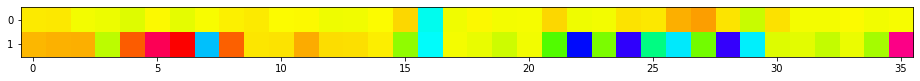

In [274]:
def rgbnorm(rgb):
    rgb -= rgb.min()
    rgb /= rgb.max()+0.01
    return rgb

spectrum_list = []
for task in tasks:
    policies = policy_list[task]    
    spectrum = np.stack([rgbnorm(policy) for policy in policies])
    spectrum = np.repeat(spectrum[np.newaxis,:,:],1,axis=0)
    spectrum_list.append(spectrum)
plt.figure(figsize=(16,2))
plt.imshow(np.concatenate(spectrum_list,axis=0))

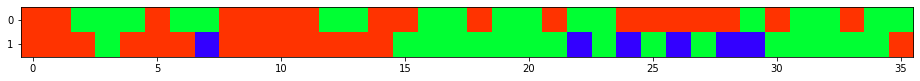

In [275]:
spectrum_list = []
for task in tasks:
    policies = policy_list[task]   
    idx = np.argmax(policies,axis=1)
    spectrum = np.zeros([len(idx),3])
    spectrum[np.arange(len(idx)),idx] = 1.0
    spectrum[np.arange(len(idx)),(idx+1)%3] = 0.2
    spectrum = np.repeat(spectrum[np.newaxis,:,:],1,axis=0)
    spectrum_list.append(spectrum)

plt.figure(figsize=(16,2))
plt.imshow(np.concatenate(spectrum_list,axis=0))

# Generate random policy

In [4]:
import random
from collections import OrderedDict
from scipy.special import softmax

In [5]:
state = torch.load('/mnt/nfs/work1/huiguan/lijunzhang/policymtl/checkpoint/Cityscapes-mnasnet/' + 'alter_train_with_reg_0005_20000iter.model')
mtlmodel.load_state_dict(state['state_dict'], strict=False)

<All keys matched successfully>

In [6]:
policy_list = {'segment_semantic': [], 'depth_zbuffer': []}
name_list = {'segment_semantic': [], 'depth_zbuffer': []}
for name, param in mtlmodel.named_parameters():
    if 'policy' in name and not torch.eq(param, torch.tensor([0., 0., 0.]).cuda()).all():
        if 'segment_semantic' in name:
            policy_list['segment_semantic'].append(param.data.cpu().detach().numpy())
            name_list['segment_semantic'].append(name)
        elif 'depth_zbuffer' in name:
            policy_list['depth_zbuffer'].append(param.data.cpu().detach().numpy())
            name_list['depth_zbuffer'].append(name)

In [9]:
random.seed(98)

# shuffle from existed policy randomly
random_policy_dict = OrderedDict()
for task in tasks:
    temp = policy_list[task].copy()
    random.shuffle(temp)
    
    count = 0
    for name in name_list[task]:
        random_policy_dict[name] = torch.tensor(temp[count]).cuda()
        count += 1
random_state = {'state_dict': random_policy_dict}
torch.save(random_state, 'checkpoints/Cityscapes/' + 'random_policy_as_task_alter_train_13600iter_seed98.model')

In [76]:
torch.manual_seed(98)

# random initilization
random_policy_dict = OrderedDict()
for task in tasks:
    for name in name_list[task]:
        random_policy_dict[name] = torch.rand(3).cuda()
random_state = {'state_dict': random_policy_dict}
torch.save(random_state, 'checkpoints/Cityscapes/' + 'random_policy_seed98.model')

In [7]:
torch.manual_seed(98)

# The first 20 Conv to be shared
shared = 20
random_policy_dict = OrderedDict()
for task in tasks:
    count = 0
    for name in name_list[task]:
        if count < shared:
            random_policy_dict[name] = torch.tensor([1.0,0.0,0.0]).cuda()
        else:
            random_policy_dict[name] = torch.rand(3).cuda()
        count += 1
random_state = {'state_dict': random_policy_dict}
torch.save(random_state, '/mnt/nfs/work1/huiguan/lijunzhang/policymtl/checkpoint/Cityscapes-mnasnet/' + 'random_policy_with_bottom20_shared_seed98.model')

In [66]:
np.random.seed(98)

# sample from trained policy
sample_policy_dict = OrderedDict()
for task in tasks:
    for name, policy in zip(name_list[task], policy_list[task]):
        distribution = softmax(policy, axis=-1)
        choice = np.random.choice((0,1,2), p=distribution)
        if choice == 0:
            sample_policy_dict[name] = torch.tensor([1.0,0.0,0.0]).cuda()
        elif choice == 1:
            sample_policy_dict[name] = torch.tensor([0.0,1.0,0.0]).cuda()
        elif choice == 2:
            sample_policy_dict[name] = torch.tensor([0.0,0.0,1.0]).cuda()

In [52]:
# test
random_state = torch.load('checkpoints/Cityscapes/' + 'random_policy_seed98.model')
mtlmodel.load_state_dict(random_state['state_dict'],  strict=False)

_IncompatibleKeys(missing_keys=['headsDict.segment_semantic.fc1.conv1.weight', 'headsDict.segment_semantic.fc1.conv1.bias', 'headsDict.segment_semantic.fc1.conv2.weight', 'headsDict.segment_semantic.fc1.conv2.bias', 'headsDict.segment_semantic.fc1.conv3.weight', 'headsDict.segment_semantic.fc1.conv3.bias', 'headsDict.segment_semantic.fc2.conv1.weight', 'headsDict.segment_semantic.fc2.conv1.bias', 'headsDict.segment_semantic.fc2.conv2.weight', 'headsDict.segment_semantic.fc2.conv2.bias', 'headsDict.segment_semantic.fc2.conv3.weight', 'headsDict.segment_semantic.fc2.conv3.bias', 'headsDict.segment_semantic.fc3.conv1.weight', 'headsDict.segment_semantic.fc3.conv1.bias', 'headsDict.segment_semantic.fc3.conv2.weight', 'headsDict.segment_semantic.fc3.conv2.bias', 'headsDict.segment_semantic.fc3.conv3.weight', 'headsDict.segment_semantic.fc3.conv3.bias', 'headsDict.segment_semantic.fc4.conv1.weight', 'headsDict.segment_semantic.fc4.conv1.bias', 'headsDict.segment_semantic.fc4.conv2.weight', '

In [53]:
random_state

{'state_dict': OrderedDict([('net.0.policy.segment_semantic',
               tensor([0.8013, 0.9743, 0.0132], device='cuda:0')),
              ('net.4.policy.segment_semantic',
               tensor([0.1849, 0.2576, 0.4162], device='cuda:0')),
              ('net.7.policy.segment_semantic',
               tensor([0.5283, 0.6112, 0.3682], device='cuda:0')),
              ('net.11.policy.segment_semantic',
               tensor([0.8037, 0.5521, 0.1797], device='cuda:0')),
              ('net.14.policy.segment_semantic',
               tensor([0.5865, 0.1435, 0.1253], device='cuda:0')),
              ('net.18.policy.segment_semantic',
               tensor([0.0908, 0.2993, 0.4109], device='cuda:0')),
              ('net.21.policy.segment_semantic',
               tensor([0.0246, 0.2858, 0.5702], device='cuda:0')),
              ('net.25.policy.segment_semantic',
               tensor([0.7914, 0.7014, 0.4357], device='cuda:0')),
              ('net.27.policy.segment_semantic',
            

# Model parmas

In [4]:
state = torch.load('/mnt/nfs/work1/huiguan/lijunzhang/policymtl/checkpoint/Cityscapes/' + 'sample_design3/0-60/sample_policy_seed60.model')
mtlmodel.load_state_dict(state['state_dict'], strict=False)

_IncompatibleKeys(missing_keys=['headsDict.segment_semantic.fc1.conv1.weight', 'headsDict.segment_semantic.fc1.conv1.bias', 'headsDict.segment_semantic.fc1.conv2.weight', 'headsDict.segment_semantic.fc1.conv2.bias', 'headsDict.segment_semantic.fc1.conv3.weight', 'headsDict.segment_semantic.fc1.conv3.bias', 'headsDict.segment_semantic.fc2.conv1.weight', 'headsDict.segment_semantic.fc2.conv1.bias', 'headsDict.segment_semantic.fc2.conv2.weight', 'headsDict.segment_semantic.fc2.conv2.bias', 'headsDict.segment_semantic.fc2.conv3.weight', 'headsDict.segment_semantic.fc2.conv3.bias', 'headsDict.segment_semantic.fc3.conv1.weight', 'headsDict.segment_semantic.fc3.conv1.bias', 'headsDict.segment_semantic.fc3.conv2.weight', 'headsDict.segment_semantic.fc3.conv2.bias', 'headsDict.segment_semantic.fc3.conv3.weight', 'headsDict.segment_semantic.fc3.conv3.bias', 'headsDict.segment_semantic.fc4.conv1.weight', 'headsDict.segment_semantic.fc4.conv1.bias', 'headsDict.segment_semantic.fc4.conv2.weight', '

In [45]:
name_list = ['segment_semantic', 'depth_zbuffer']

singleParam = 0
mtlParam = 0
for node in mtlmodel.net:
    if node.taskSp and not node.assumeSp:
        shared = False
        
        params = node.basicOp.weight.data.nelement()
        if conv.bias is not None:
            params += node.basicOp.bias.data.nelement()
        singleParam += params
        
        for task in name_list:
            policy = node.policy[task].data.cpu().detach().numpy()
            if np.array_equal(policy, np.array([1.,0.,0.])):
                if not shared:
                    mtlParam += params
                    shared = True
            elif np.array_equal(policy, np.array([0.,1.,0.])):
                mtlParam += params

In [1]:
mtlParam / (singleParam * len(name_list)) - 1

NameError: name 'mtlParam' is not defined

# Test Regularization

In [176]:
scale = 1
class RegModel(nn.Module):
    def __init__(self):
        super(RegModel, self).__init__()
        self.policy = nn.Parameter(torch.tensor([0.0,0.0,0.0]))
        
    def forward(self):
        possiblity = nn.functional.gumbel_softmax(self.policy, tau=5, hard=False)
#         possiblity = nn.functional.softmax(self.policy)
#         loss = torch.exp(scale * (possiblity[1]-possiblity[0])) + torch.exp(scale * (possiblity[2]-possiblity[0]))
        loss = torch.log(1+torch.exp(scale * (possiblity[1]-possiblity[0]))) + \
               torch.log(1+torch.exp(scale * (possiblity[2]-possiblity[0])))
        print(self.policy)
        print(possiblity)
        return loss

In [177]:
regM = RegModel()
optimizer = torch.optim.SGD(regM.parameters(),lr=0.01)

In [178]:
for i in range(1000):
    optimizer.zero_grad()
    output = regM()
    output.backward()
    print('output:{}'.format(output))
    optimizer.step()

Parameter containing:
tensor([0., 0., 0.], requires_grad=True)
tensor([0.4721, 0.2448, 0.2831], grad_fn=<SoftmaxBackward>)
output:1.1890517473220825
Parameter containing:
tensor([ 0.0007, -0.0003, -0.0004], requires_grad=True)
tensor([0.2924, 0.3744, 0.3333], grad_fn=<SoftmaxBackward>)
output:1.4488097429275513
Parameter containing:
tensor([ 0.0013, -0.0007, -0.0007], requires_grad=True)
tensor([0.2130, 0.4115, 0.3755], grad_fn=<SoftmaxBackward>)
output:1.5750212669372559
Parameter containing:
tensor([ 0.0019, -0.0009, -0.0009], requires_grad=True)
tensor([0.2897, 0.3058, 0.4046], grad_fn=<SoftmaxBackward>)
output:1.4534697532653809
Parameter containing:
tensor([ 0.0025, -0.0012, -0.0013], requires_grad=True)
tensor([0.4019, 0.2974, 0.3007], grad_fn=<SoftmaxBackward>)
output:1.2860963344573975
Parameter containing:
tensor([ 0.0032, -0.0015, -0.0016], requires_grad=True)
tensor([0.4381, 0.3021, 0.2599], grad_fn=<SoftmaxBackward>)
output:1.235487461090088
Parameter containing:
tensor([ 0

Parameter containing:
tensor([ 0.0807, -0.0397, -0.0411], requires_grad=True)
tensor([0.4961, 0.2465, 0.2574], grad_fn=<SoftmaxBackward>)
output:1.1569557189941406
Parameter containing:
tensor([ 0.0814, -0.0400, -0.0414], requires_grad=True)
tensor([0.2993, 0.4298, 0.2710], grad_fn=<SoftmaxBackward>)
output:1.439603567123413
Parameter containing:
tensor([ 0.0820, -0.0404, -0.0416], requires_grad=True)
tensor([0.3189, 0.2958, 0.3854], grad_fn=<SoftmaxBackward>)
output:1.4086323976516724
Parameter containing:
tensor([ 0.0827, -0.0407, -0.0420], requires_grad=True)
tensor([0.3041, 0.2757, 0.4203], grad_fn=<SoftmaxBackward>)
output:1.4319849014282227
Parameter containing:
tensor([ 0.0833, -0.0409, -0.0424], requires_grad=True)
tensor([0.4234, 0.2869, 0.2897], grad_fn=<SoftmaxBackward>)
output:1.2557528018951416
Parameter containing:
tensor([ 0.0840, -0.0413, -0.0428], requires_grad=True)
tensor([0.3519, 0.3796, 0.2685], grad_fn=<SoftmaxBackward>)
output:1.3594114780426025
Parameter contain

output:1.3425955772399902
Parameter containing:
tensor([ 0.1431, -0.0694, -0.0737], requires_grad=True)
tensor([0.3290, 0.3379, 0.3331], grad_fn=<SoftmaxBackward>)
output:1.3928425312042236
Parameter containing:
tensor([ 0.1438, -0.0697, -0.0741], requires_grad=True)
tensor([0.3170, 0.3056, 0.3773], grad_fn=<SoftmaxBackward>)
output:1.4112019538879395
Parameter containing:
tensor([ 0.1444, -0.0700, -0.0744], requires_grad=True)
tensor([0.3502, 0.3059, 0.3439], grad_fn=<SoftmaxBackward>)
output:1.361180067062378
Parameter containing:
tensor([ 0.1451, -0.0703, -0.0748], requires_grad=True)
tensor([0.4980, 0.2025, 0.2995], grad_fn=<SoftmaxBackward>)
output:1.1550649404525757
Parameter containing:
tensor([ 0.1457, -0.0706, -0.0752], requires_grad=True)
tensor([0.3223, 0.4398, 0.2380], grad_fn=<SoftmaxBackward>)
output:1.4055206775665283
Parameter containing:
tensor([ 0.1464, -0.0710, -0.0754], requires_grad=True)
tensor([0.3835, 0.2271, 0.3894], grad_fn=<SoftmaxBackward>)
output:1.31413531

tensor([ 0.1984, -0.0967, -0.1018], requires_grad=True)
tensor([0.3568, 0.3653, 0.2779], grad_fn=<SoftmaxBackward>)
output:1.3518402576446533
Parameter containing:
tensor([ 0.1991, -0.0971, -0.1021], requires_grad=True)
tensor([0.4589, 0.3088, 0.2323], grad_fn=<SoftmaxBackward>)
output:1.2071961164474487
Parameter containing:
tensor([ 0.1998, -0.0974, -0.1023], requires_grad=True)
tensor([0.2474, 0.2215, 0.5311], grad_fn=<SoftmaxBackward>)
output:1.5252362489700317
Parameter containing:
tensor([ 0.2004, -0.0976, -0.1028], requires_grad=True)
tensor([0.3455, 0.3653, 0.2893], grad_fn=<SoftmaxBackward>)
output:1.368540644645691
Parameter containing:
tensor([ 0.2011, -0.0980, -0.1031], requires_grad=True)
tensor([0.3851, 0.3139, 0.3010], grad_fn=<SoftmaxBackward>)
output:1.3101621866226196
Parameter containing:
tensor([ 0.2017, -0.0983, -0.1034], requires_grad=True)
tensor([0.2901, 0.3243, 0.3856], grad_fn=<SoftmaxBackward>)
output:1.4524662494659424
Parameter containing:
tensor([ 0.2024, 

tensor([ 0.2662, -0.1304, -0.1357], requires_grad=True)
tensor([0.2827, 0.3876, 0.3296], grad_fn=<SoftmaxBackward>)
output:1.4638503789901733
Parameter containing:
tensor([ 0.2668, -0.1308, -0.1360], requires_grad=True)
tensor([0.2973, 0.3621, 0.3406], grad_fn=<SoftmaxBackward>)
output:1.4410946369171143
Parameter containing:
tensor([ 0.2674, -0.1311, -0.1363], requires_grad=True)
tensor([0.4024, 0.3189, 0.2787], grad_fn=<SoftmaxBackward>)
output:1.285436749458313
Parameter containing:
tensor([ 0.2681, -0.1315, -0.1366], requires_grad=True)
tensor([0.2624, 0.4437, 0.2939], grad_fn=<SoftmaxBackward>)
output:1.4969500303268433
Parameter containing:
tensor([ 0.2687, -0.1319, -0.1369], requires_grad=True)
tensor([0.4099, 0.2594, 0.3307], grad_fn=<SoftmaxBackward>)
output:1.2750602960586548
Parameter containing:
tensor([ 0.2694, -0.1322, -0.1373], requires_grad=True)
tensor([0.3038, 0.2794, 0.4168], grad_fn=<SoftmaxBackward>)
output:1.4323145151138306
Parameter containing:
tensor([ 0.2701, 

output:1.4538811445236206
Parameter containing:
tensor([ 0.3182, -0.1576, -0.1607], requires_grad=True)
tensor([0.3876, 0.3172, 0.2952], grad_fn=<SoftmaxBackward>)
output:1.3065884113311768
Parameter containing:
tensor([ 0.3189, -0.1579, -0.1610], requires_grad=True)
tensor([0.4236, 0.2991, 0.2772], grad_fn=<SoftmaxBackward>)
output:1.2554850578308105
Parameter containing:
tensor([ 0.3196, -0.1583, -0.1613], requires_grad=True)
tensor([0.3948, 0.2918, 0.3134], grad_fn=<SoftmaxBackward>)
output:1.2961852550506592
Parameter containing:
tensor([ 0.3203, -0.1586, -0.1617], requires_grad=True)
tensor([0.4668, 0.2905, 0.2428], grad_fn=<SoftmaxBackward>)
output:1.1962597370147705
Parameter containing:
tensor([ 0.3210, -0.1590, -0.1620], requires_grad=True)
tensor([0.3237, 0.3694, 0.3069], grad_fn=<SoftmaxBackward>)
output:1.4009714126586914
Parameter containing:
tensor([ 0.3216, -0.1594, -0.1623], requires_grad=True)
tensor([0.2697, 0.3819, 0.3483], grad_fn=<SoftmaxBackward>)
output:1.4840238

tensor([0.3139, 0.3720, 0.3141], grad_fn=<SoftmaxBackward>)
output:1.4158375263214111
Parameter containing:
tensor([ 0.3821, -0.1880, -0.1941], requires_grad=True)
tensor([0.2021, 0.3124, 0.4855], grad_fn=<SoftmaxBackward>)
output:1.5946592092514038
Parameter containing:
tensor([ 0.3826, -0.1882, -0.1944], requires_grad=True)
tensor([0.2928, 0.3146, 0.3926], grad_fn=<SoftmaxBackward>)
output:1.4483351707458496
Parameter containing:
tensor([ 0.3833, -0.1885, -0.1948], requires_grad=True)
tensor([0.3052, 0.3964, 0.2984], grad_fn=<SoftmaxBackward>)
output:1.4294633865356445
Parameter containing:
tensor([ 0.3839, -0.1888, -0.1951], requires_grad=True)
tensor([0.2966, 0.4576, 0.2458], grad_fn=<SoftmaxBackward>)
output:1.4449416399002075
Parameter containing:
tensor([ 0.3846, -0.1893, -0.1953], requires_grad=True)
tensor([0.4786, 0.2839, 0.2375], grad_fn=<SoftmaxBackward>)
output:1.1803141832351685
Parameter containing:
tensor([ 0.3852, -0.1897, -0.1956], requires_grad=True)
tensor([0.3578, 

Parameter containing:
tensor([ 0.4775, -0.2359, -0.2416], requires_grad=True)
tensor([0.3597, 0.4605, 0.1799], grad_fn=<SoftmaxBackward>)
output:1.352121353149414
Parameter containing:
tensor([ 0.4782, -0.2364, -0.2417], requires_grad=True)
tensor([0.3363, 0.3920, 0.2718], grad_fn=<SoftmaxBackward>)
output:1.3827927112579346
Parameter containing:
tensor([ 0.4788, -0.2368, -0.2420], requires_grad=True)
tensor([0.4100, 0.2360, 0.3540], grad_fn=<SoftmaxBackward>)
output:1.2754743099212646
Parameter containing:
tensor([ 0.4795, -0.2371, -0.2424], requires_grad=True)
tensor([0.3620, 0.3327, 0.3053], grad_fn=<SoftmaxBackward>)
output:1.3437693119049072
Parameter containing:
tensor([ 0.4802, -0.2375, -0.2427], requires_grad=True)
tensor([0.3769, 0.2586, 0.3645], grad_fn=<SoftmaxBackward>)
output:1.322721004486084
Parameter containing:
tensor([ 0.4809, -0.2377, -0.2432], requires_grad=True)
tensor([0.3383, 0.3086, 0.3531], grad_fn=<SoftmaxBackward>)
output:1.3789252042770386
Parameter containi

output:1.5250056982040405
Parameter containing:
tensor([ 0.5797, -0.2870, -0.2927], requires_grad=True)
tensor([0.3097, 0.4104, 0.2799], grad_fn=<SoftmaxBackward>)
output:1.4231470823287964
Parameter containing:
tensor([ 0.5803, -0.2874, -0.2930], requires_grad=True)
tensor([0.4152, 0.2551, 0.3298], grad_fn=<SoftmaxBackward>)
output:1.2676773071289062
Parameter containing:
tensor([ 0.5810, -0.2877, -0.2933], requires_grad=True)
tensor([0.4610, 0.2886, 0.2504], grad_fn=<SoftmaxBackward>)
output:1.2040953636169434
Parameter containing:
tensor([ 0.5817, -0.2880, -0.2937], requires_grad=True)
tensor([0.4186, 0.3041, 0.2773], grad_fn=<SoftmaxBackward>)
output:1.2625433206558228
Parameter containing:
tensor([ 0.5824, -0.2884, -0.2940], requires_grad=True)
tensor([0.5400, 0.2677, 0.1923], grad_fn=<SoftmaxBackward>)
output:1.1005544662475586
Parameter containing:
tensor([ 0.5830, -0.2888, -0.2942], requires_grad=True)
tensor([0.4404, 0.2790, 0.2806], grad_fn=<SoftmaxBackward>)
output:1.2321045

# Check Results

In [4]:
mtlmodel.load_state_dict(torch.load("checkpoints/Cityscapes/layerwise_policy_train_20600iter.model")['state_dict'])
# mtlmodel.load_state_dict(torch.load("checkpoints/Cityscapes/task_alter_train_5200iter.model")['state_dict'])

<All keys matched successfully>

In [16]:
task_idx = 0
for i, data in enumerate(valDataloaderDict[tasks[task_idx]]):
    x = data['input']
    y = data['label']
    break
    
task = tasks[task_idx]
tau = 2.0518

In [76]:
mtlmodel.train()
loss_list = []
for i, data in enumerate(valDataloaderDict[task]):
    x1 = data['input'].cuda()
    y1 = data['label'].cuda()

    output = mtlmodel(x1, 'mtl', task, tau=tau, hard=False)

    if 'mask' in data:
        loss = criterionDict[task](output, y1, data['mask'].cuda())
        metricDict[task](output, y1, data['mask'].cuda())
    else:
        loss = criterionDict[task](output, y1)
        metricDict[task](output, y1)

    loss_list.append(loss.item())

avg_loss = np.mean(loss_list)
val_results = metricDict[task].val_metrics()

In [83]:
avg_loss

2.595853839069605

In [60]:
mtlmodel.eval()

MTLModel(
  (headsDict): ModuleDict(
    (segment_semantic): ASPPHeadNode(
      (fc1): Classification_Module(
        (conv1): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(6, 6), dilation=(6, 6))
        (conv2): Conv2d(1024, 1024, kernel_size=(1, 1), stride=(1, 1))
        (conv3): Conv2d(1024, 19, kernel_size=(1, 1), stride=(1, 1))
        (relu): ReLU(inplace=True)
        (dropout): Dropout(p=0.5, inplace=False)
      )
      (fc2): Classification_Module(
        (conv1): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(12, 12), dilation=(12, 12))
        (conv2): Conv2d(1024, 1024, kernel_size=(1, 1), stride=(1, 1))
        (conv3): Conv2d(1024, 19, kernel_size=(1, 1), stride=(1, 1))
        (relu): ReLU(inplace=True)
        (dropout): Dropout(p=0.5, inplace=False)
      )
      (fc3): Classification_Module(
        (conv1): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(18, 18), dilation=(18, 18))
        (conv2): Conv2d(1024, 1024, 

In [18]:
i = 0
# output = mtlmodel(x.cuda(), 'pre_train', tasks[task_idx])
output = mtlmodel(x.cuda(), 'pre_train_specific', tasks[task_idx])
# output = mtlmodel(x.cuda(), 'mtl', task=task, tau=tau)

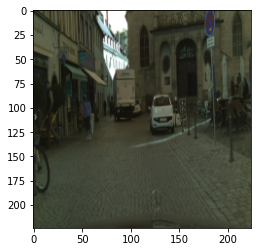

In [19]:
plt.imshow(x.permute(0,2,3,1)[i].int())

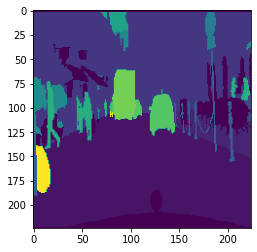

In [20]:
plt.imshow(y.permute(0,2,3,1)[i])

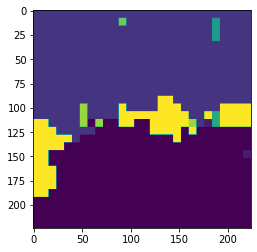

In [21]:
# seg
def resize_pred(pred, gt):
    return F.interpolate(pred, size=gt.shape[-2:])
pred = output
gt = y.cuda()
output = resize_pred(pred, gt)
prediction = torch.argmax(output, dim=1)
plt.imshow(prediction.cpu().detach().numpy()[i])

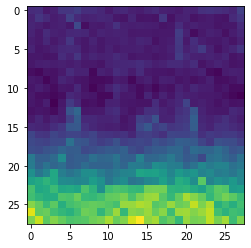

In [31]:
# depth
plt.imshow(output.cpu().detach().numpy()[i,0])

# Others

In [12]:
mtlmodel.net[0].taskOp.segment_semantic.weight

Parameter containing:
tensor([[[[ 1.9348e-01,  1.9046e-01,  1.7868e-01,  ...,  1.6289e-01,
            1.3305e-01,  1.4691e-01],
          [ 1.1127e-01,  1.8490e-02, -1.9056e-02,  ...,  1.0792e-01,
            7.5129e-02,  2.6224e-02],
          [ 5.9161e-02,  1.2628e-01,  4.1456e-02,  ...,  4.8540e-02,
           -5.2689e-02, -2.5313e-02],
          ...,
          [-1.7076e-01, -1.6649e-01, -5.4048e-02,  ..., -4.0136e-02,
           -1.8000e-01, -5.5735e-02],
          [-9.9670e-02, -1.1982e-01, -4.6479e-02,  ..., -2.8480e-02,
           -1.6647e-01, -4.2167e-02],
          [-1.4900e-02, -1.7457e-01, -1.2356e-01,  ..., -1.2068e-01,
           -1.8828e-01, -1.7409e-01]],

         [[ 3.9546e-01,  2.6007e-01,  3.0369e-01,  ...,  3.1506e-01,
            2.8149e-01,  3.6778e-01],
          [ 2.1045e-01,  1.4817e-01,  1.9734e-01,  ...,  2.0418e-01,
            2.5394e-01,  2.3090e-01],
          [ 2.2047e-01,  7.8727e-02,  2.1716e-01,  ...,  2.0573e-01,
            2.2162e-01,  1.1520e-01]

In [13]:
mtlmodel.net[0].taskOp.depth_zbuffer.weight

Parameter containing:
tensor([[[[-1.8881e-03,  1.8505e-02,  4.4373e-02,  ..., -1.2325e-02,
           -4.9379e-02, -4.5097e-02],
          [ 9.0981e-02,  4.1538e-02,  2.7948e-02,  ...,  1.1081e-01,
            5.2511e-02, -2.9954e-02],
          [ 8.2137e-02,  1.5644e-01,  7.6825e-02,  ...,  5.3679e-02,
           -4.4415e-02, -1.1095e-02],
          ...,
          [ 7.3310e-03,  6.0403e-03,  1.1486e-01,  ...,  1.0638e-01,
           -2.8108e-02,  1.0947e-01],
          [ 4.7898e-02,  2.8627e-02,  1.0086e-01,  ...,  9.8602e-02,
           -4.2270e-02,  8.3925e-02],
          [ 1.5200e-01, -1.0719e-03,  4.9900e-02,  ...,  3.8274e-02,
           -4.1196e-02, -3.8045e-02]],

         [[ 1.4453e-01,  2.7311e-02,  1.0204e-01,  ...,  4.7457e-02,
            3.2276e-03,  7.7583e-02],
          [ 7.5282e-02,  4.6295e-02,  1.1917e-01,  ...,  7.4346e-02,
            8.8846e-02,  3.4213e-02],
          [ 1.2747e-01,  6.2407e-04,  1.4398e-01,  ...,  8.4125e-02,
            9.4608e-02, -9.4846e-03]

In [10]:
print(mtlmodel)

MTLModel(
  (headsDict): ModuleDict(
    (segment_semantic): ASPPHeadNode(
      (fc1): Classification_Module(
        (conv1): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(6, 6), dilation=(6, 6))
        (conv2): Conv2d(1024, 1024, kernel_size=(1, 1), stride=(1, 1))
        (conv3): Conv2d(1024, 19, kernel_size=(1, 1), stride=(1, 1))
        (relu): ReLU(inplace=True)
        (dropout): Dropout(p=0.5, inplace=False)
      )
      (fc2): Classification_Module(
        (conv1): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(12, 12), dilation=(12, 12))
        (conv2): Conv2d(1024, 1024, kernel_size=(1, 1), stride=(1, 1))
        (conv3): Conv2d(1024, 19, kernel_size=(1, 1), stride=(1, 1))
        (relu): ReLU(inplace=True)
        (dropout): Dropout(p=0.5, inplace=False)
      )
      (fc3): Classification_Module(
        (conv1): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(18, 18), dilation=(18, 18))
        (conv2): Conv2d(1024, 1024, 